# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Multivariate Relationships](#27-multivariate-relationships)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Data Scaling](#28-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to create a classification model that can accurately predict the WCB’s final decision on what type o 
injury (Claim Injury Type) should be given to a caim.l To do that, the
WCB has provided labelled data with all claims assembled between
2020 and 2022 <br>

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>

## 1.1 Importing Libraries <a name="11-importing-libraries"></a>

### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by WCB.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`District Name` Name of the WCB district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if there is an agreement without the involvement of the WCB; otherwise unknown at the start of a claim.  
`WCB Decision` Multiclass variable: Decision of the WCB relative to the claim; "Accident" indicates a workplace accident, and "Occupational Disease" indicates illness from the workplace, both of which require WCB deliberation and may be unknown at the claim's start.  
`Claim Injury Type` Main target variable: Deliberation of the WCB relative to benefits awarded to the claim, with numbering indicating severity.  
aim, with numbering indicating severity. <br>  

In [169]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kmodes.kmodes import KModes
from math import ceil
from sklearn.metrics import (classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score, 
                             precision_score, recall_score, make_scorer, silhouette_score)
from sklearn.model_selection import (train_test_split, RepeatedStratifiedKFold, StratifiedKFold, 
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.linear_model import LassoCV, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, 
                              HistGradientBoostingClassifier, StackingClassifier, VotingClassifier)
from sklearn.utils import class_weight
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from openpyxl import load_workbook
from imblearn.over_sampling import SMOTE, SVMSMOTE
from scipy.stats import randint as sp_randint

%config InlineBackend.figure_format = 'retina'

sns.set()

import warnings
warnings.filterwarnings('ignore')

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>

In [75]:
wcb_train = pd.read_csv('train_data.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', None)

In [76]:
wcb_test = pd.read_csv('test_data.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', None)

In [77]:
wcb_train.head(5)

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>

#### Shape

In [78]:
wcb_train.shape

(593471, 33)

In [79]:
wcb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [80]:
wcb_train.tail(5)
# No, there isn't any

Accident Date  Age at Injury Alternative Dispute Resolution  \
593466           NaN            NaN                            NaN   
593467    2022-12-13           72.0                              N   
593468           NaN            NaN                            NaN   
593469           NaN            NaN                            NaN   
593470           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
593466    2022-12-31                     NaN                  NaN         NaN   
593467    2022-12-31                       N                  0.0      1950.0   
593468    2022-12-31                     NaN                  NaN         NaN   
593469    2022-12-31                     NaN                  NaN         NaN   
593470    2022-12-31                     NaN                  NaN         NaN   

          C-2 Date C-3 Date                   Carrier Name Carrier Type  \
593466         NaN      NaN                            NaN          NaN   
593467  2022-12-31      NaN  TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE   
593468         NaN      NaN                            NaN          NaN   
593469         NaN      NaN                            NaN          NaN   
593470         NaN      NaN                            NaN          NaN   

        Claim Identifier Claim Injury Type County of Injury  \
593466         327160035               NaN              NaN   
593467           6165075       2. NON-COMP         SULLIVAN   
593468         249875936               NaN              NaN   
593469         120584215               NaN              NaN   
593470         818961390               NaN              NaN   

       COVID-19 Indicator District Name First Hearing Date Gender  \
593466                NaN           NaN                NaN    NaN   
593467                  N    BINGHAMTON                NaN      F   
593468                NaN           NaN                NaN    NaN   
593469                NaN           NaN                NaN    NaN   
593470                NaN           NaN                NaN    NaN   

        IME-4 Count  Industry Code       Industry Code Description  \
593466          NaN            NaN                             NaN   
593467          NaN           48.0  TRANSPORTATION AND WAREHOUSING   
593468          NaN            NaN                             NaN   
593469          NaN            NaN                             NaN   
593470          NaN            NaN                             NaN   

       Medical Fee Region  OIICS Nature of Injury Description  \
593466                NaN                                 NaN   
593467                  I                                 NaN   
593468                NaN                                 NaN   
593469                NaN                                 NaN   
593470                NaN                                 NaN   

        WCIO Cause of Injury Code  WCIO Cause of Injury Description  \
593466                        NaN                               NaN   
593467                       25.0  FROM DIFFERENT LEVEL (ELEVATION)   
593468                        NaN                               NaN   
593469                        NaN                               NaN   
593470                        NaN                               NaN   

        WCIO Nature of Injury Code WCIO Nature of Injury Description  \
593466                         NaN                               NaN   
593467                        90.0   MULTIPLE PHYSICAL INJURIES ONLY   
593468                         NaN                               NaN   
593469                         NaN                               NaN   
593470                         NaN                               NaN   

        WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
593466                     NaN                           NaN      NaN   
593467                    -9.0      

In [81]:
wcb_train.describe(include='object').T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389   8286   
WCB Decision                       574026      1   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3398  
WCB Decision                                        Not Work Related  574026

In [82]:
wcb_train.describe(include='number').T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
Industry Code                       564068.0  5.864531e+01  1.964417e+01   
OIICS Nature of Injury Description       0.0           NaN           NaN   
WCIO Cause of Injury Code           558386.0  5.438114e+01  2.587428e+01   
WCIO Nature of Injury Code          558369.0  4.101384e+01  2.220752e+01   
WCIO Part Of Body Code              556944.0  3.973815e+01  2.236594e+01   
Agreement Reached                   574026.0  4.666513e-02  2.109208e-01   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

## 1.4 Incoherencies <a name="14-incoherencies"></a>

In [83]:
wcb_train.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

### Datatypes:

**Numerical Data: <br>
float -> int** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` <br>
`Industry Code` <br>
`Agreement Reached` <br>


**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>

### Change in datatypes

**Numeric data from float to integer:**

In [84]:
wcb_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Industry Code', 'Agreement Reached']

for col in wcb_float_to_int:
    # Convert the column to numeric, then to Int64 (nullable integer type)
    wcb_train[col] = pd.to_numeric(wcb_train[col], errors='coerce').astype('Int64')   

**Dates from object to datetime format:**

In [85]:
# Convert dates treated as objects to datetime format
wcb_train['C-2 Date'] = pd.to_datetime(wcb_train['C-2 Date'], errors='coerce')
wcb_train['C-3 Date'] = pd.to_datetime(wcb_train['C-3 Date'], errors='coerce')
wcb_train['Accident Date'] = pd.to_datetime(wcb_train['Accident Date'], errors='coerce')
wcb_train['First Hearing Date'] = pd.to_datetime(wcb_train['First Hearing Date'], errors='coerce')
wcb_train['Assembly Date'] = pd.to_datetime(wcb_train['Assembly Date'], errors='coerce')

In [86]:
wcb_train['Gender'] = wcb_train['Gender'].replace('U', np.nan)

In [87]:
wcb_train.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                               int64
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>

### Numerical Data Visualization

In [88]:
# Supondo que o dataset X_train já está carregado no ambiente de trabalho
# Identifica colunas categóricas
categorical_columns = wcb_train.select_dtypes(include='number').columns

# Calcula a variância das frequências para cada coluna categórica
variance_results = {}

for col in categorical_columns:
    frequencies = wcb_train[col].value_counts()  # Conta a frequência de cada categoria
    variance_results[col] = frequencies.var()  # Calcula a variância das frequências

# Converte o dicionário de resultados para um DataFrame para visualização
variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

# Mostra o resultado
print(variance_df)

                              Variable      Variance
0                        Age at Injury  3.298547e+07
1                  Average Weekly Wage  9.377458e+05
2                           Birth Year  3.102951e+07
3                     Claim Identifier  1.685005e-06
4                          IME-4 Count  7.381624e+07
5                        Industry Code  7.677068e+08
6   OIICS Nature of Injury Description           NaN
7            WCIO Cause of Injury Code  9.510269e+07
8           WCIO Nature of Injury Code  7.078313e+08
9               WCIO Part Of Body Code  1.581468e+08
10                   Agreement Reached  1.354351e+11
11                Number of Dependents  1.380929e+05


Since the variable `Claim Identifier` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

In [89]:
wcb_train['Claim Identifier'].value_counts()

Claim Identifier
292668076    2
5393875      1
5906249      1
5906224      1
5906957      1
            ..
5650784      1
5650745      1
5650625      1
5649719      1
818961390    1
Name: count, Length: 593470, dtype: int64

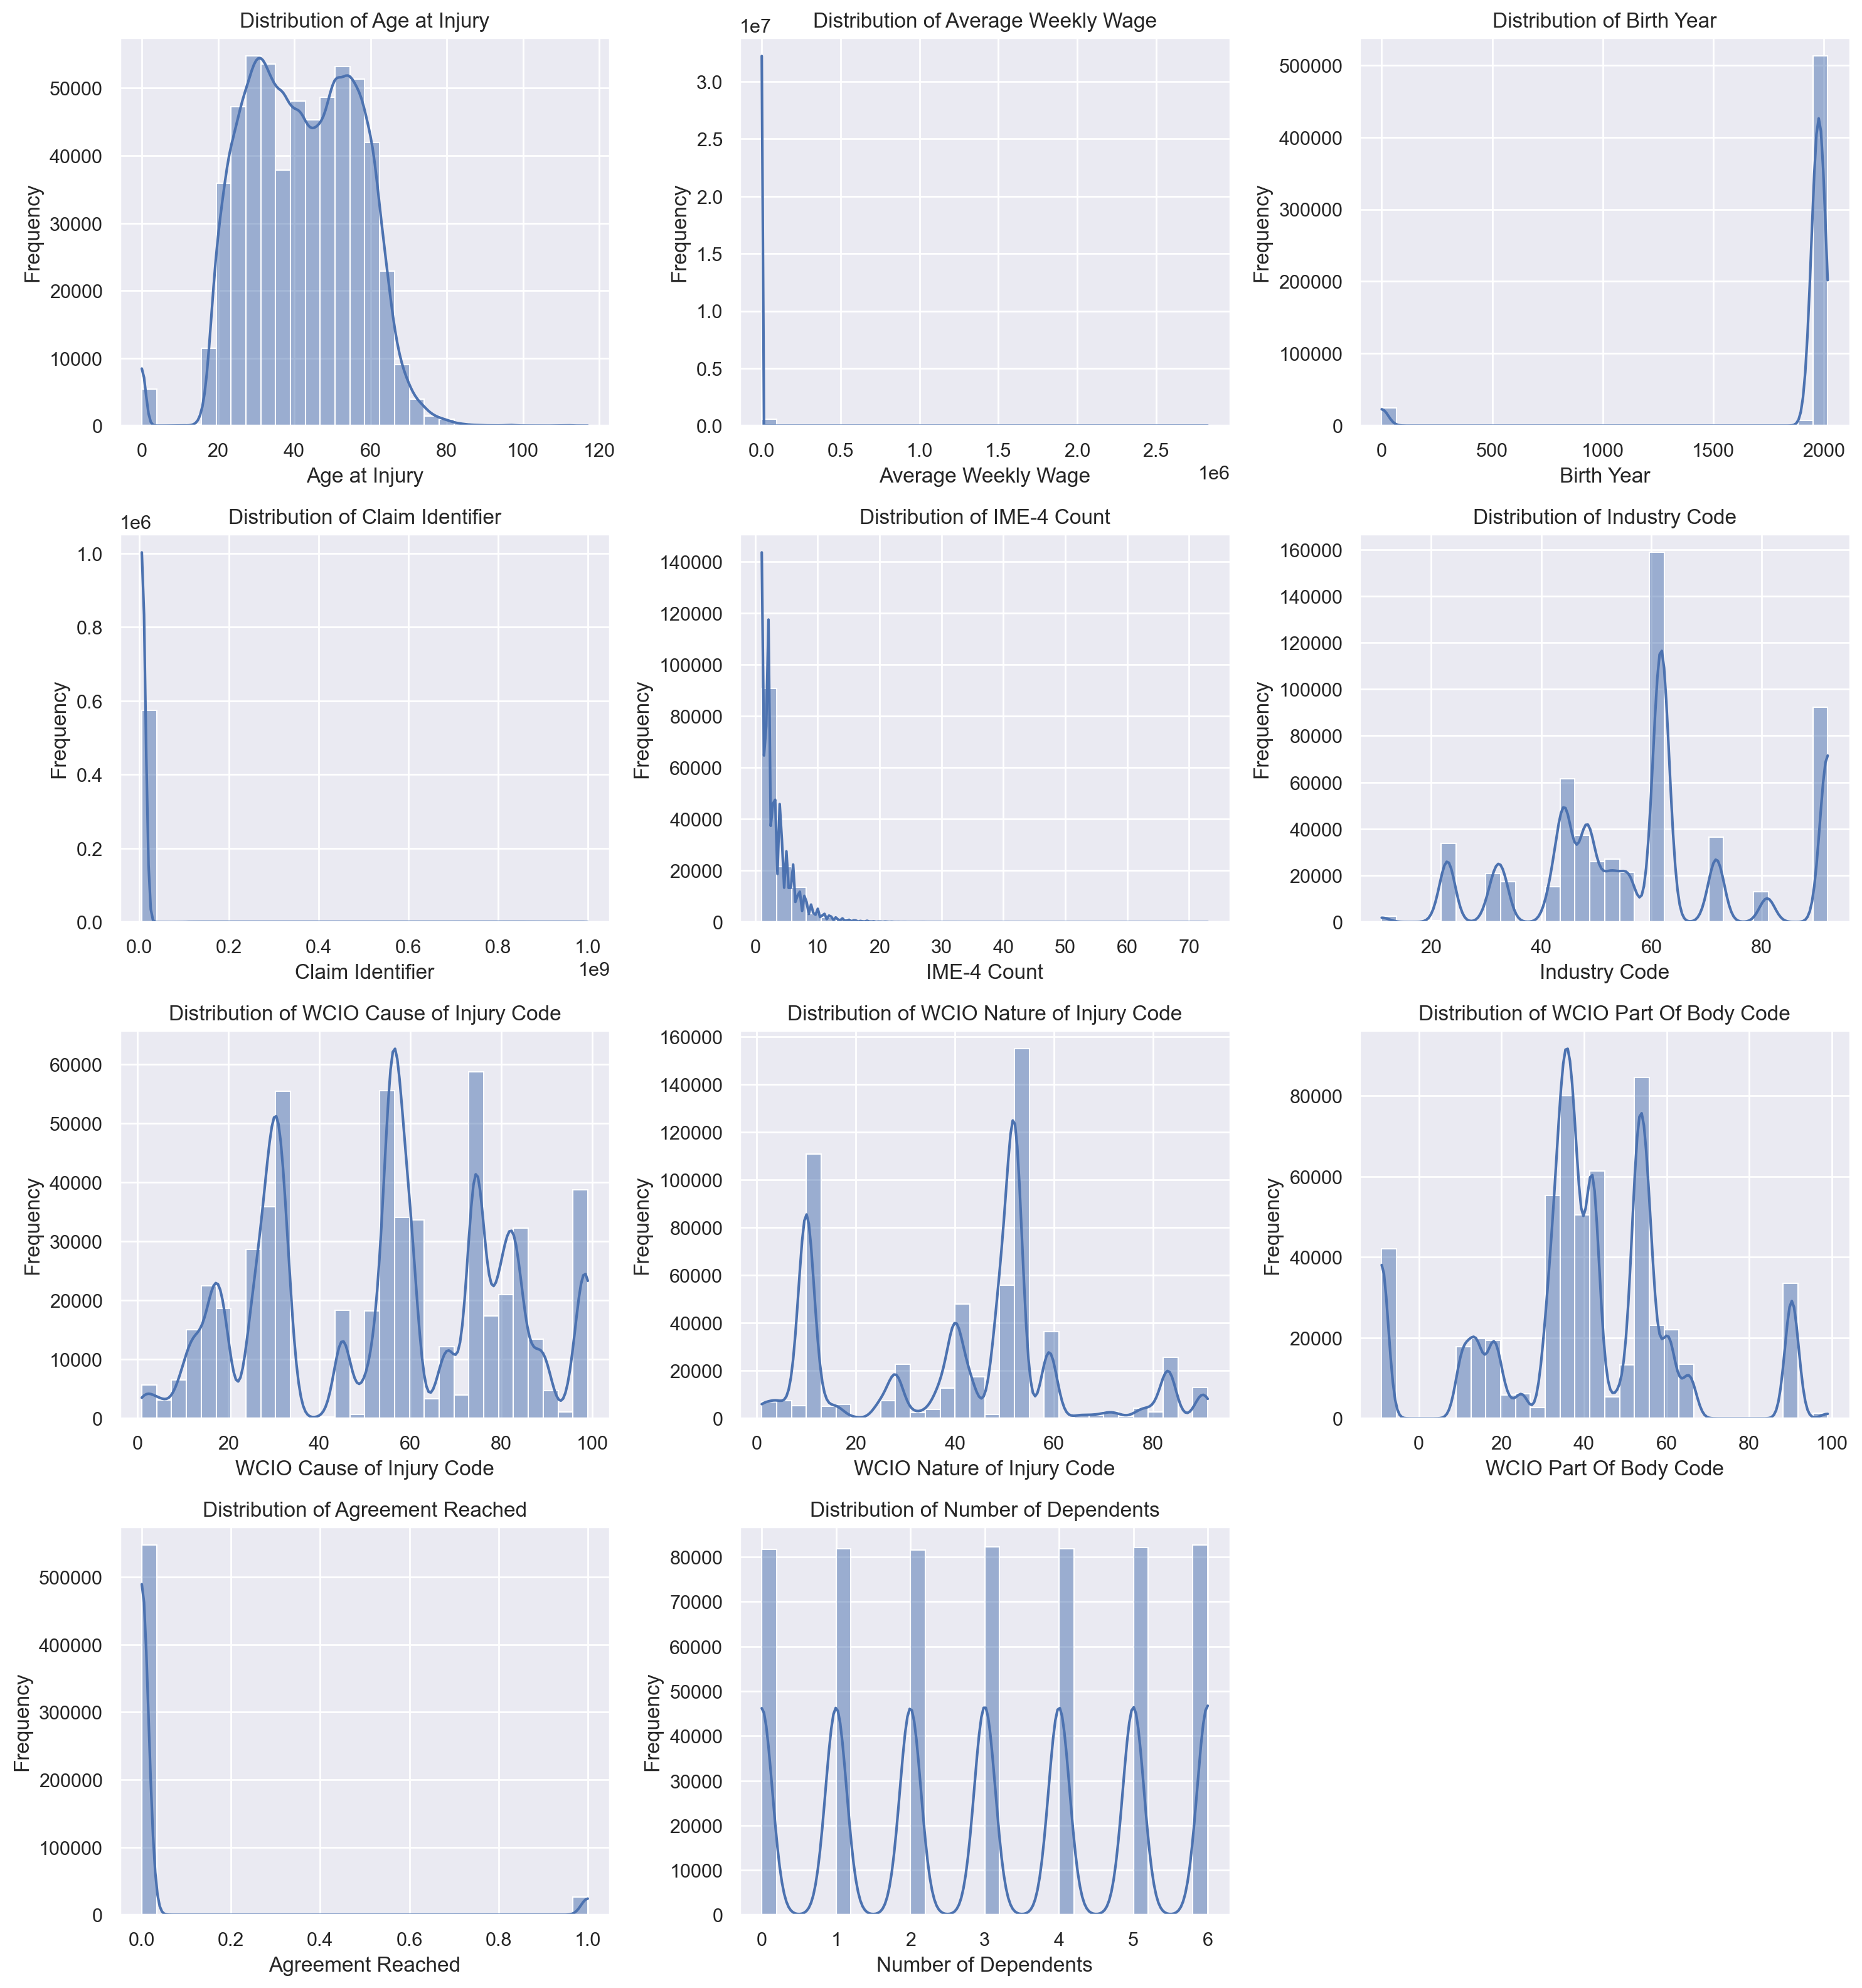

In [90]:
# Select numerical attributes with continuous values
numeric_attributes = wcb_train.loc[:, ['Age at Injury', "Average Weekly Wage", 'Birth Year', "Claim Identifier", 'IME-4 Count','Industry Code', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',"Agreement Reached", 'Number of Dependents']]

# Set the number of subplots
num_attributes = len(numeric_attributes.columns)
num_cols = 3  # Set the number of columns for the subplots
num_rows = (num_attributes // num_cols) + (num_attributes % num_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through each numerical attribute and plot its distribution
for i, column in enumerate(numeric_attributes.columns):
    sns.histplot(numeric_attributes[column], bins=30, kde=True, ax=axes[i])  # KDE adds a density curve
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**From these visualizations we can conclude:** <br>
- Majority of `Age at Injury` is between 18 and 80 <br>
- `Birth Year` may have some outliers (born year 0) <br>
- The count for `IME-4 Count` values decreases very rapidly the bigger is the count <br>
- `Agreement Reached` says that most agreements haven't been reached <br>
- `Number of Dependents` has same frequency for all its values <br>

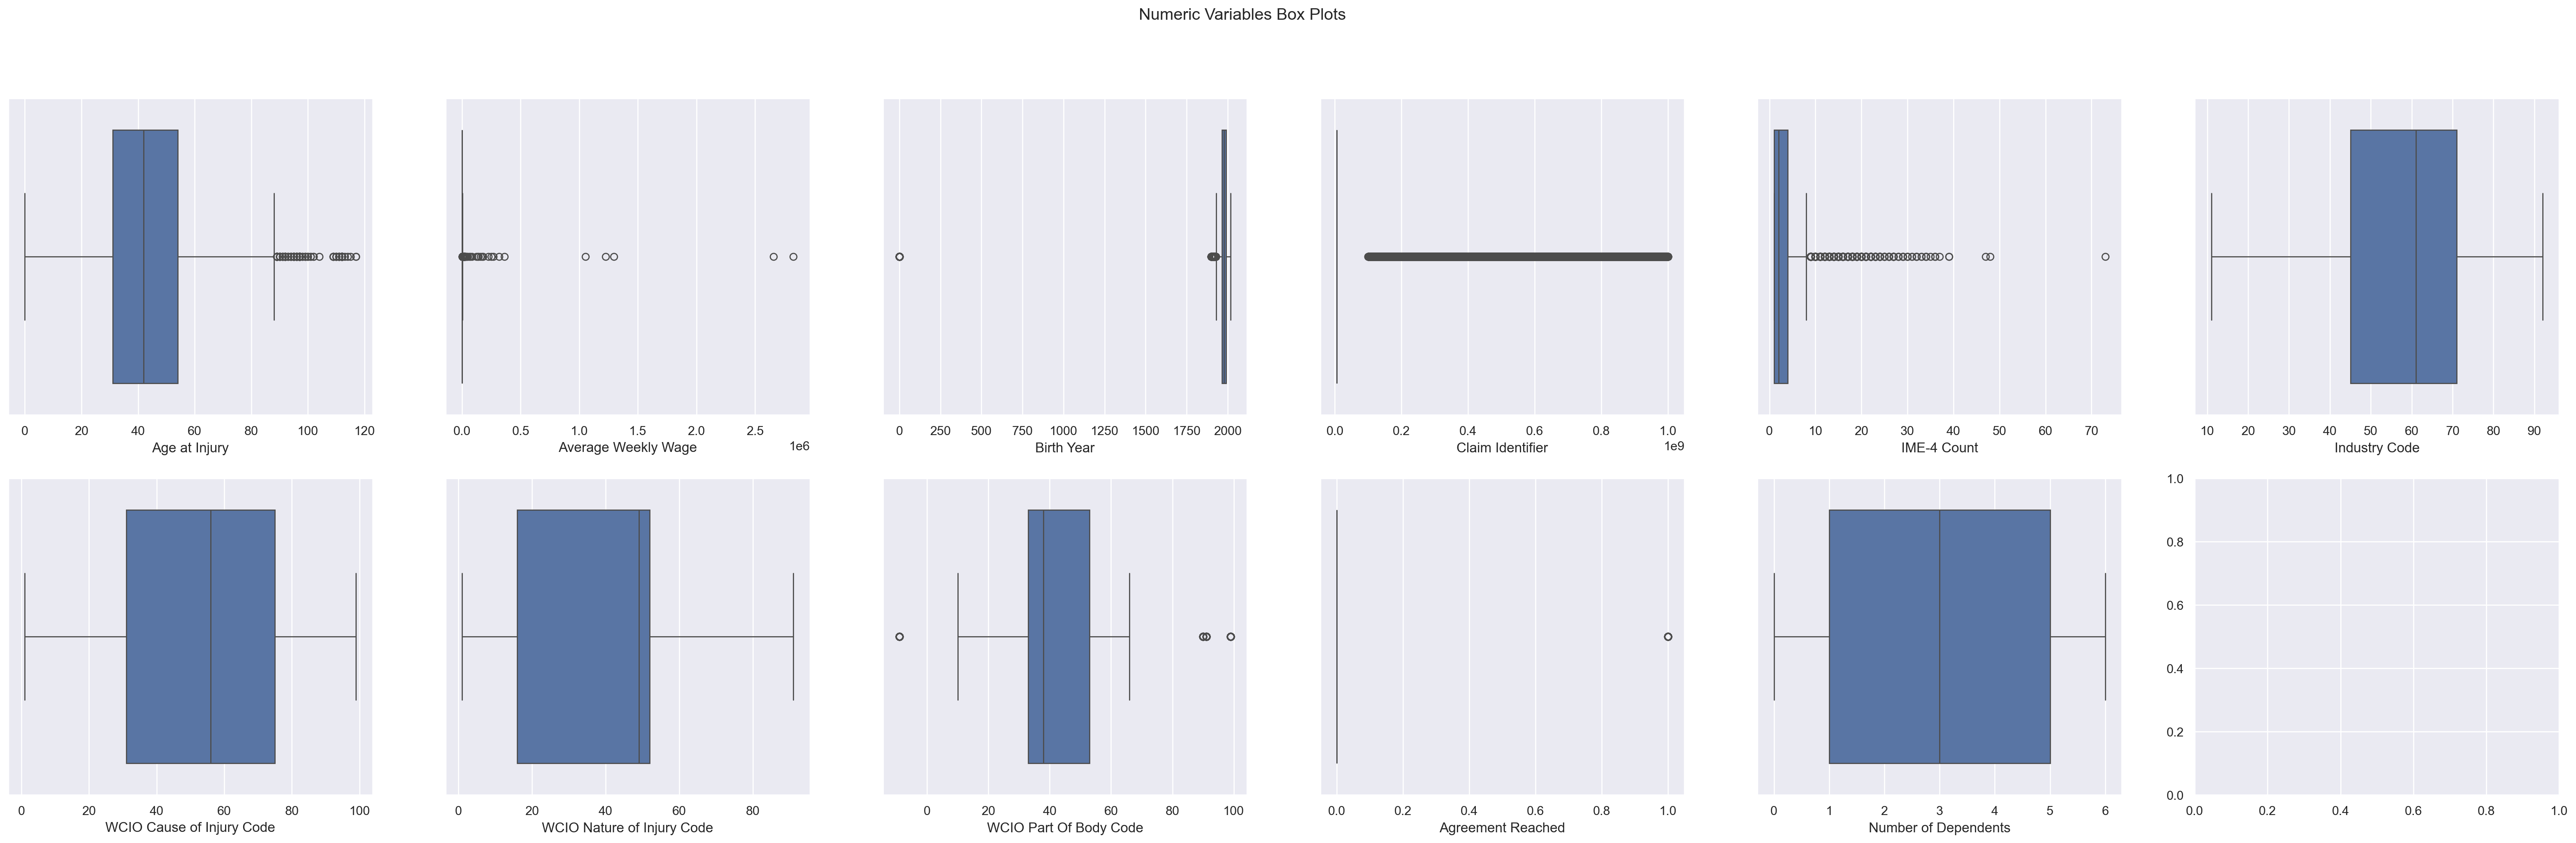

In [91]:
box_plot_features = ['Age at Injury', "Average Weekly Wage", 'Birth Year', "Claim Identifier", 'IME-4 Count','Industry Code', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',"Agreement Reached", 'Number of Dependents']

sns.set()
fig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))
for ax, feat in zip(axes.flatten(), box_plot_features):
    sns.boxplot(x=wcb_train[feat], ax=ax)
    
title = "Numeric Variables Box Plots"
plt.suptitle(title)
plt.show()

**From these visualizations we can conclude:** <br>
- Most of the outliers of `Age at Injury` are above 85 or close to that <br>
- `Average Weekly Wage` has outliers that are a few thousand times higher than the normal values <br>
- `IME-4 Count` ranges from 0 to around 8 <br>
- `WCIO Part Of Body Code` has a negative value <br>
- `Number of Dependents` has same frequency for all its values <br>

### Categorical Data Visualization

In [92]:
# Supondo que o dataset X_train já está carregado no ambiente de trabalho
# Identifica colunas categóricas
categorical_columns = wcb_train.select_dtypes(include='object').columns

# Calcula a variância das frequências para cada coluna categórica
variance_results = {}

for col in categorical_columns:
    frequencies = wcb_train[col].value_counts()  # Conta a frequência de cada categoria
    variance_results[col] = frequencies.var()  # Calcula a variância das frequências

# Converte o dicionário de resultados para um DataFrame para visualização
variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

# Mostra o resultado
print(variance_df)

                             Variable      Variance
0      Alternative Dispute Resolution  1.083416e+11
1             Attorney/Representative  2.216691e+10
2                        Carrier Name  7.315897e+06
3                        Carrier Type  1.003642e+10
4                   Claim Injury Type  1.040645e+10
5                    County of Injury  2.074888e+08
6                  COVID-19 Indicator  1.346722e+11
7                       District Name  7.060876e+09
8                              Gender  2.955556e+10
9           Industry Code Description  9.873992e+08
10                 Medical Fee Region  8.634815e+09
11   WCIO Cause of Injury Description  1.021386e+08
12  WCIO Nature of Injury Description  7.078313e+08
13      WCIO Part Of Body Description  1.645646e+08
14                           Zip Code  5.890209e+04
15                       WCB Decision           NaN


Since the variable `WCB Decision` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

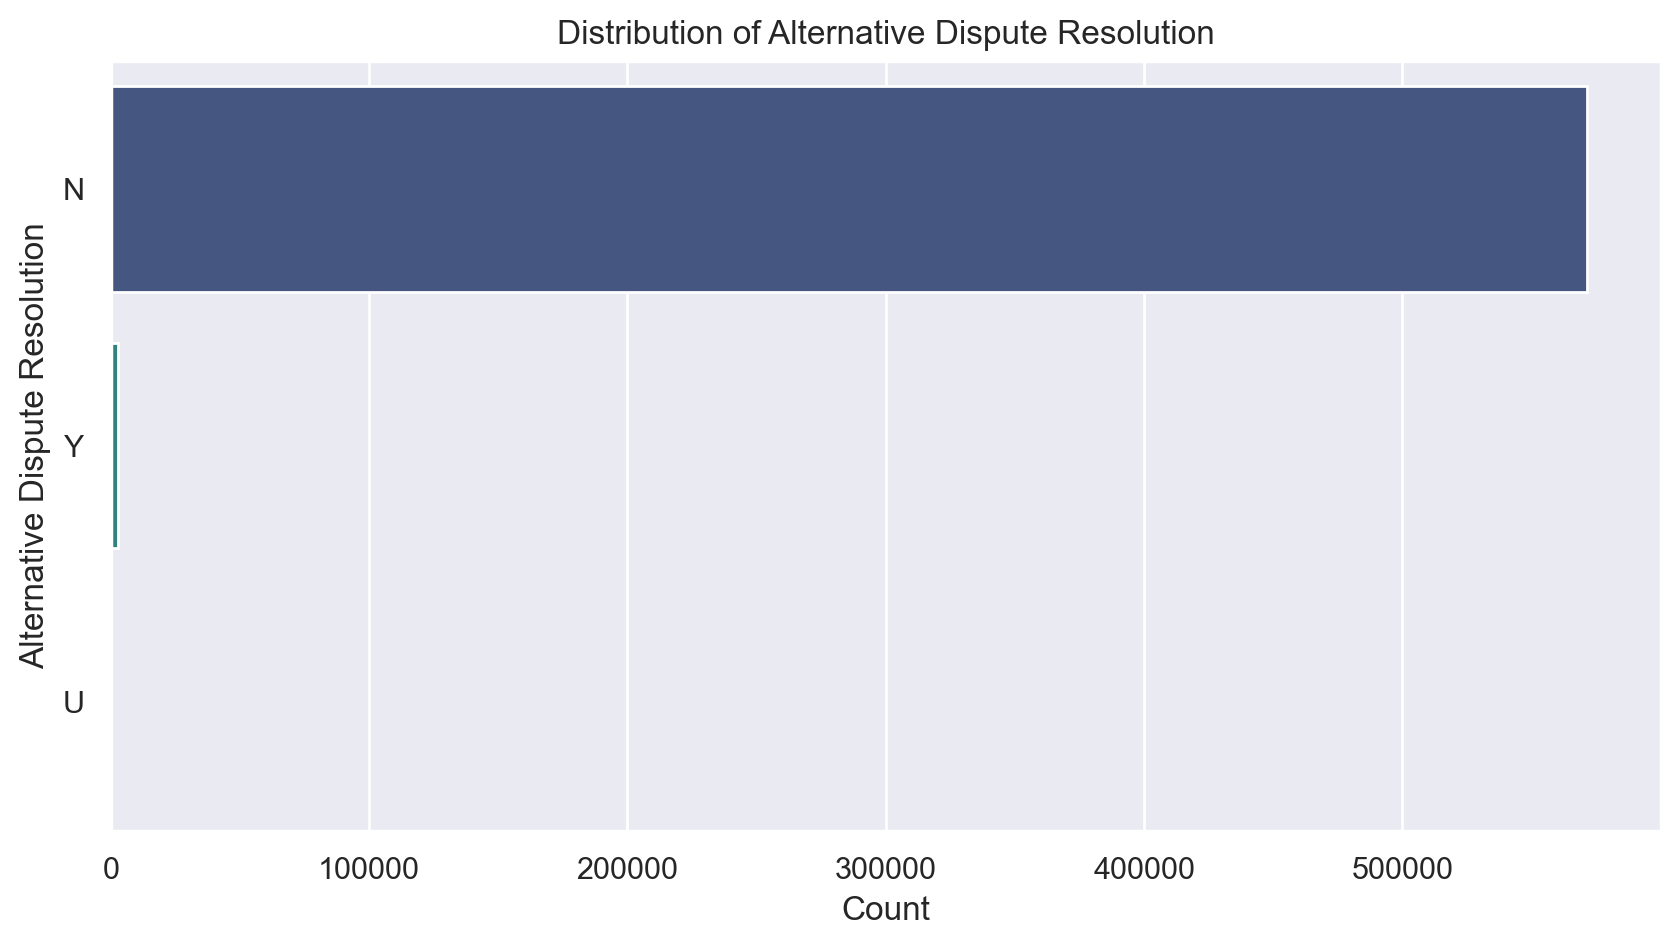

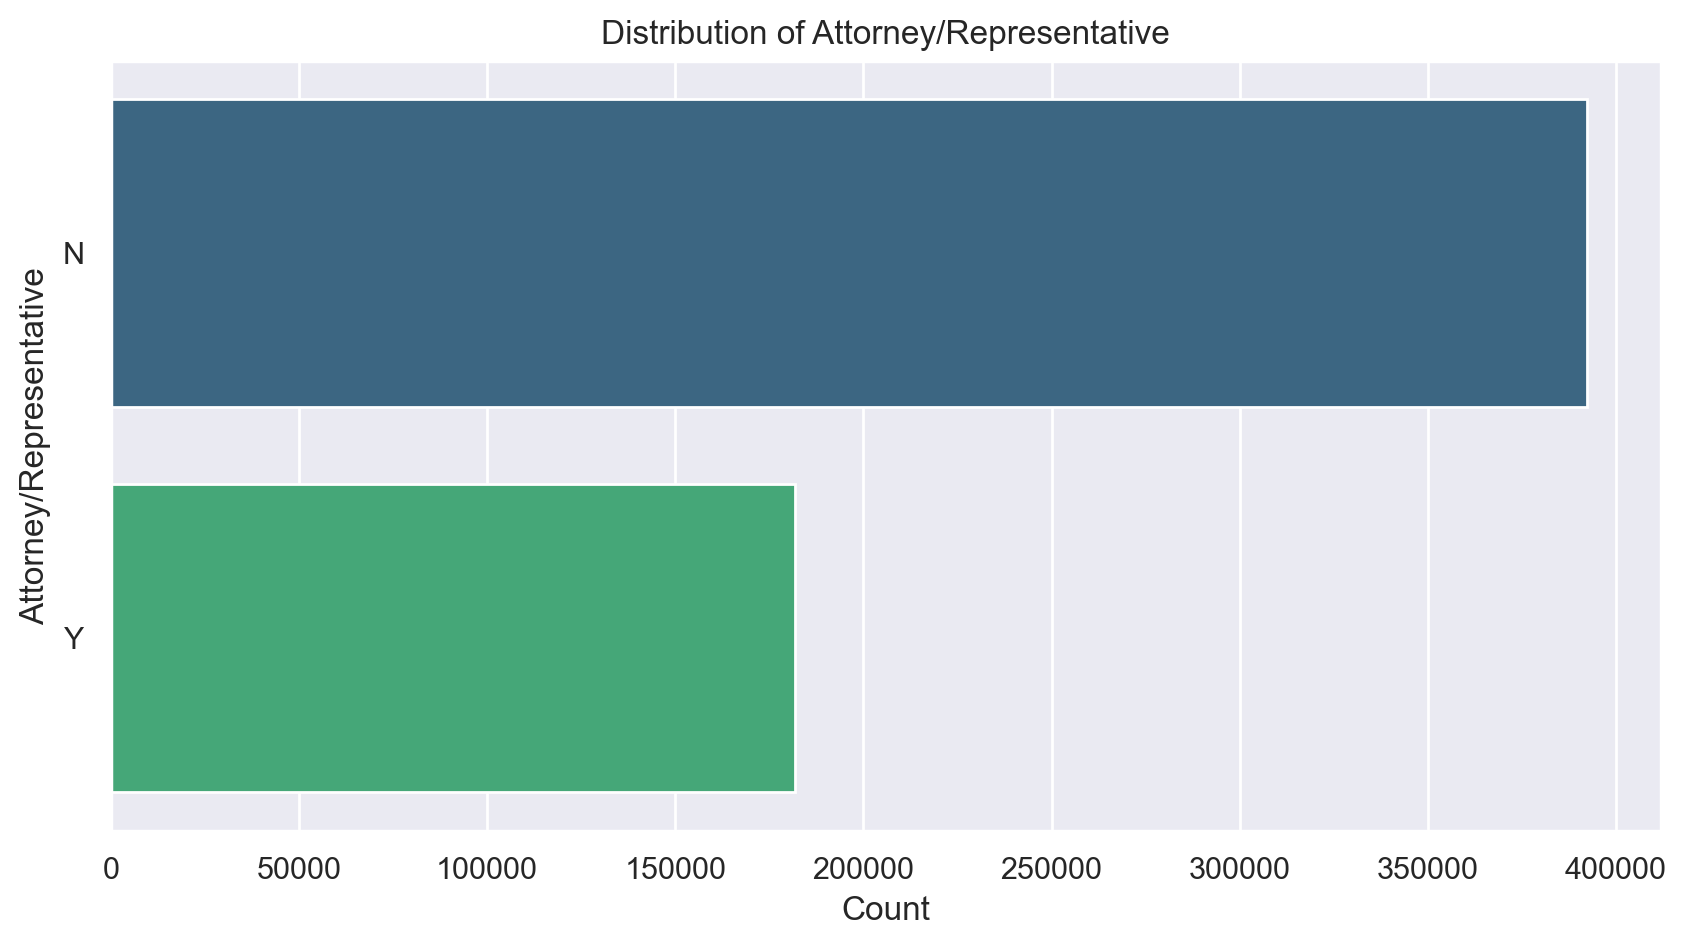

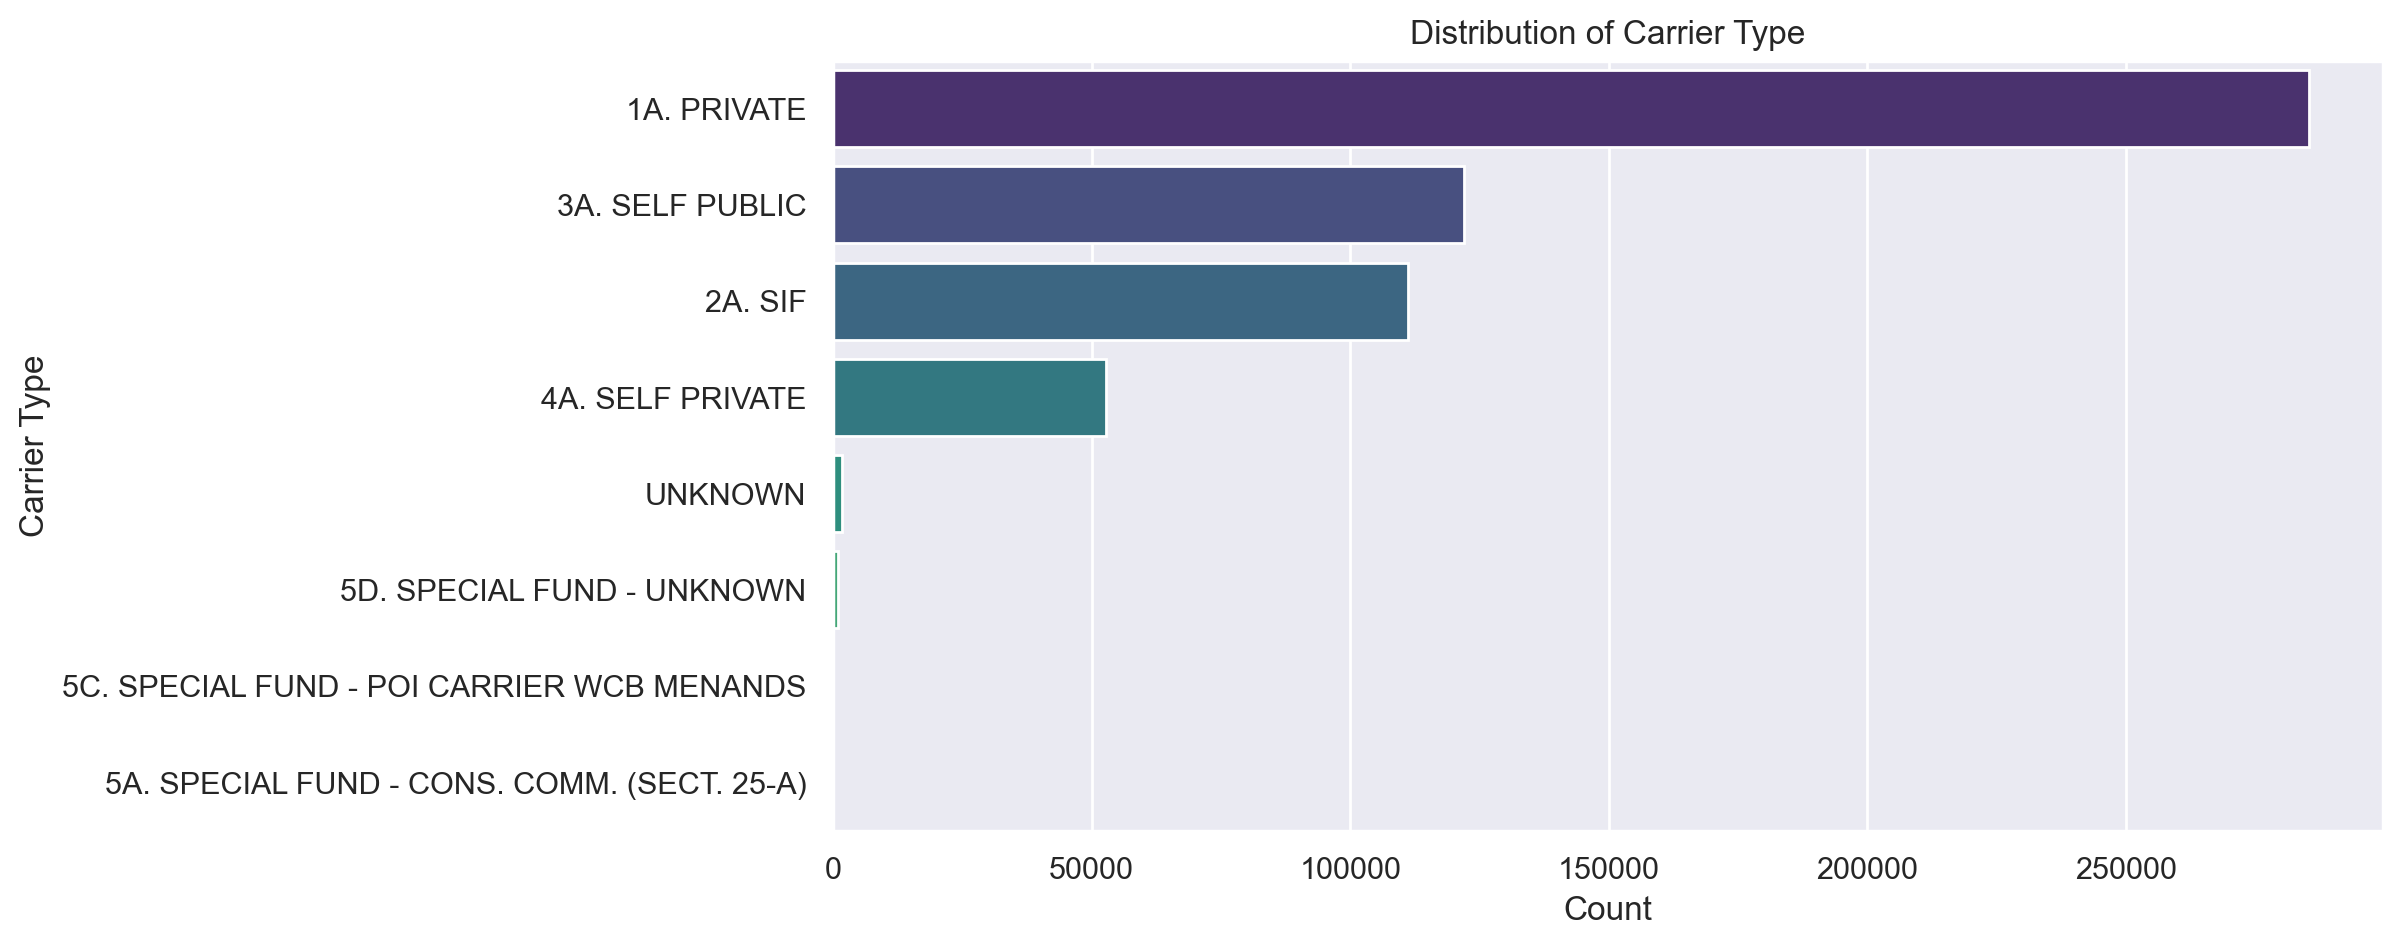

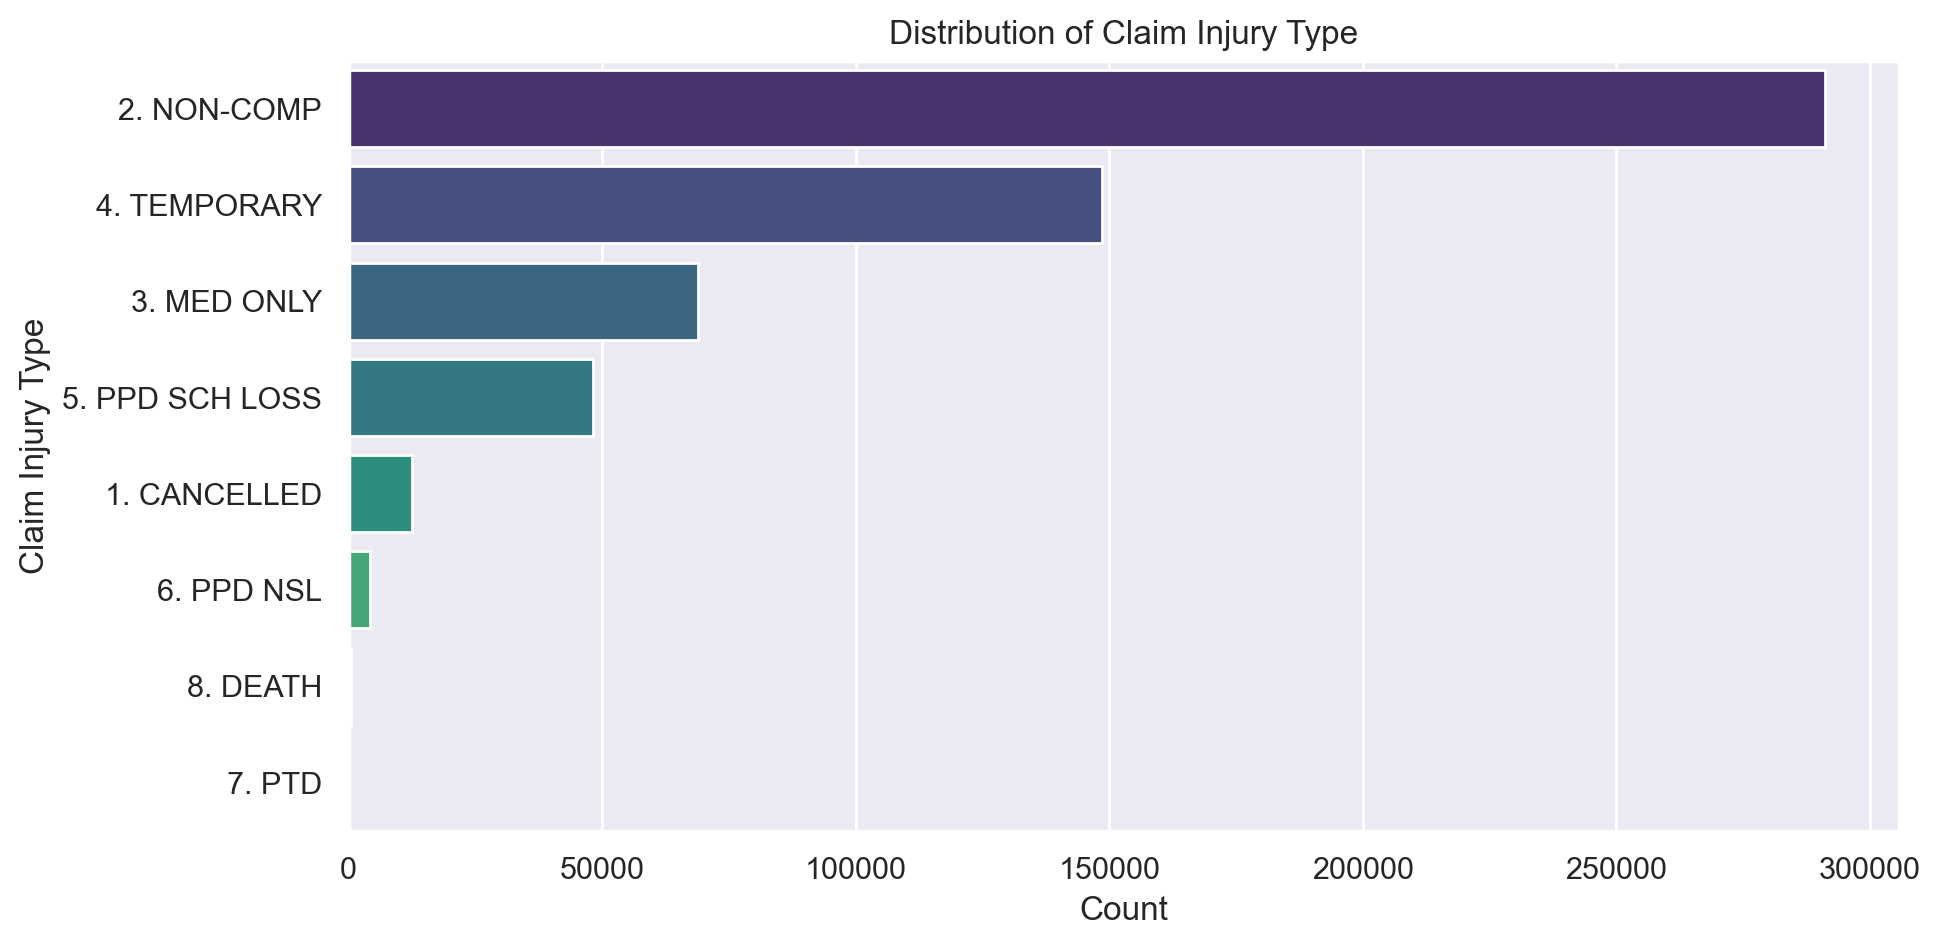

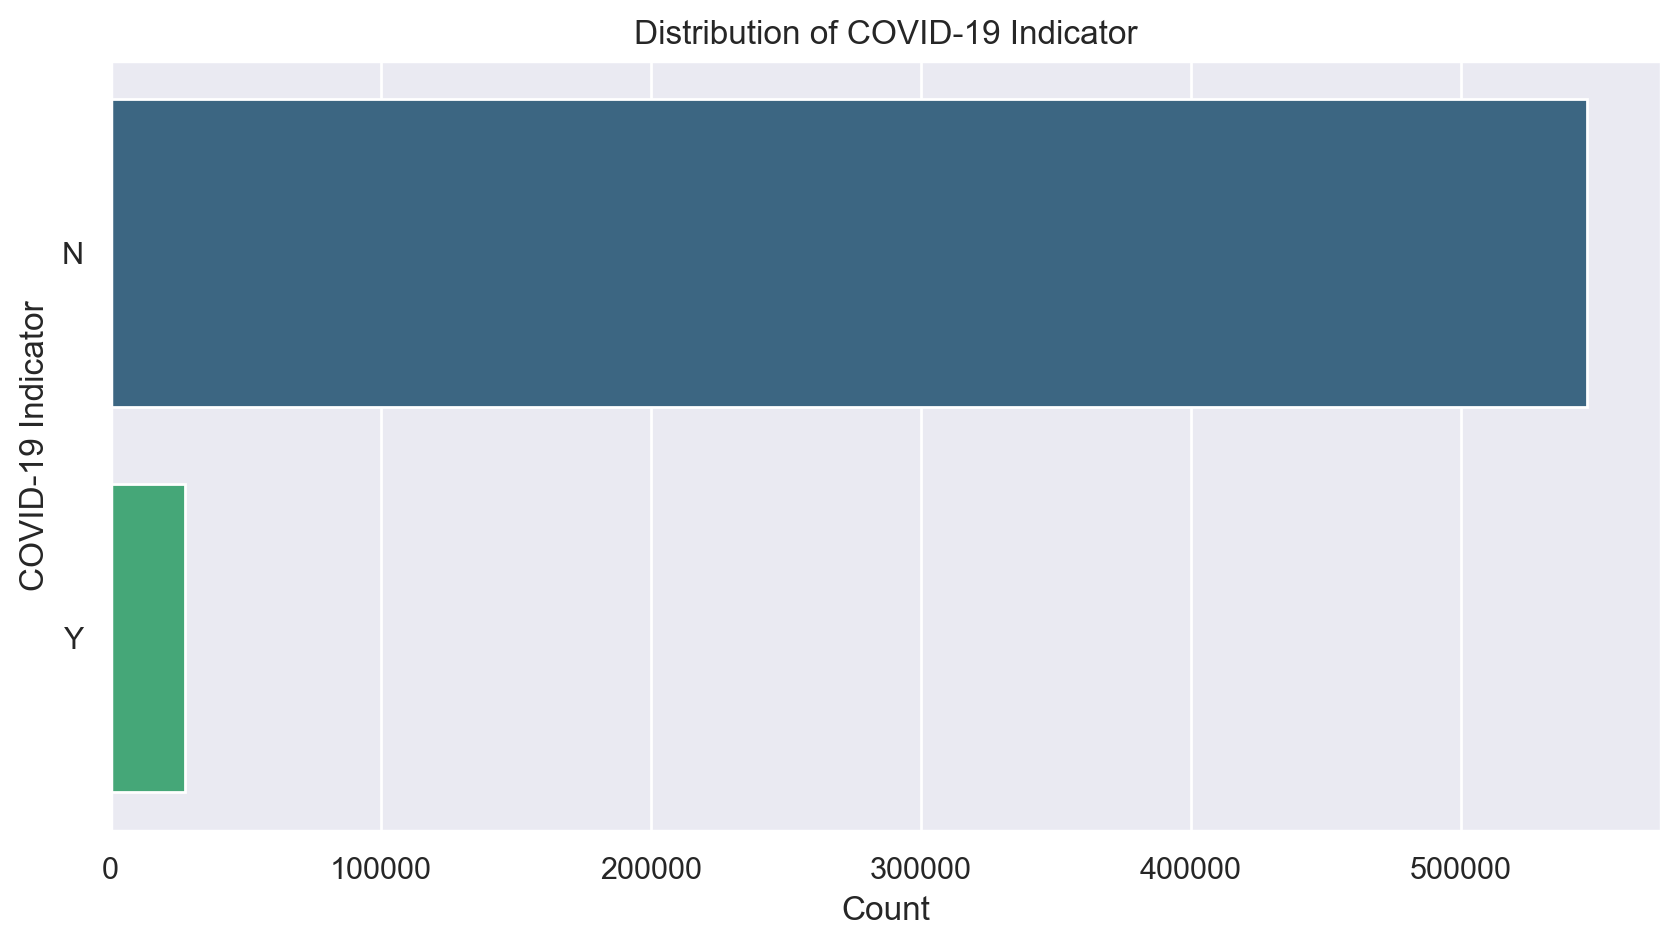

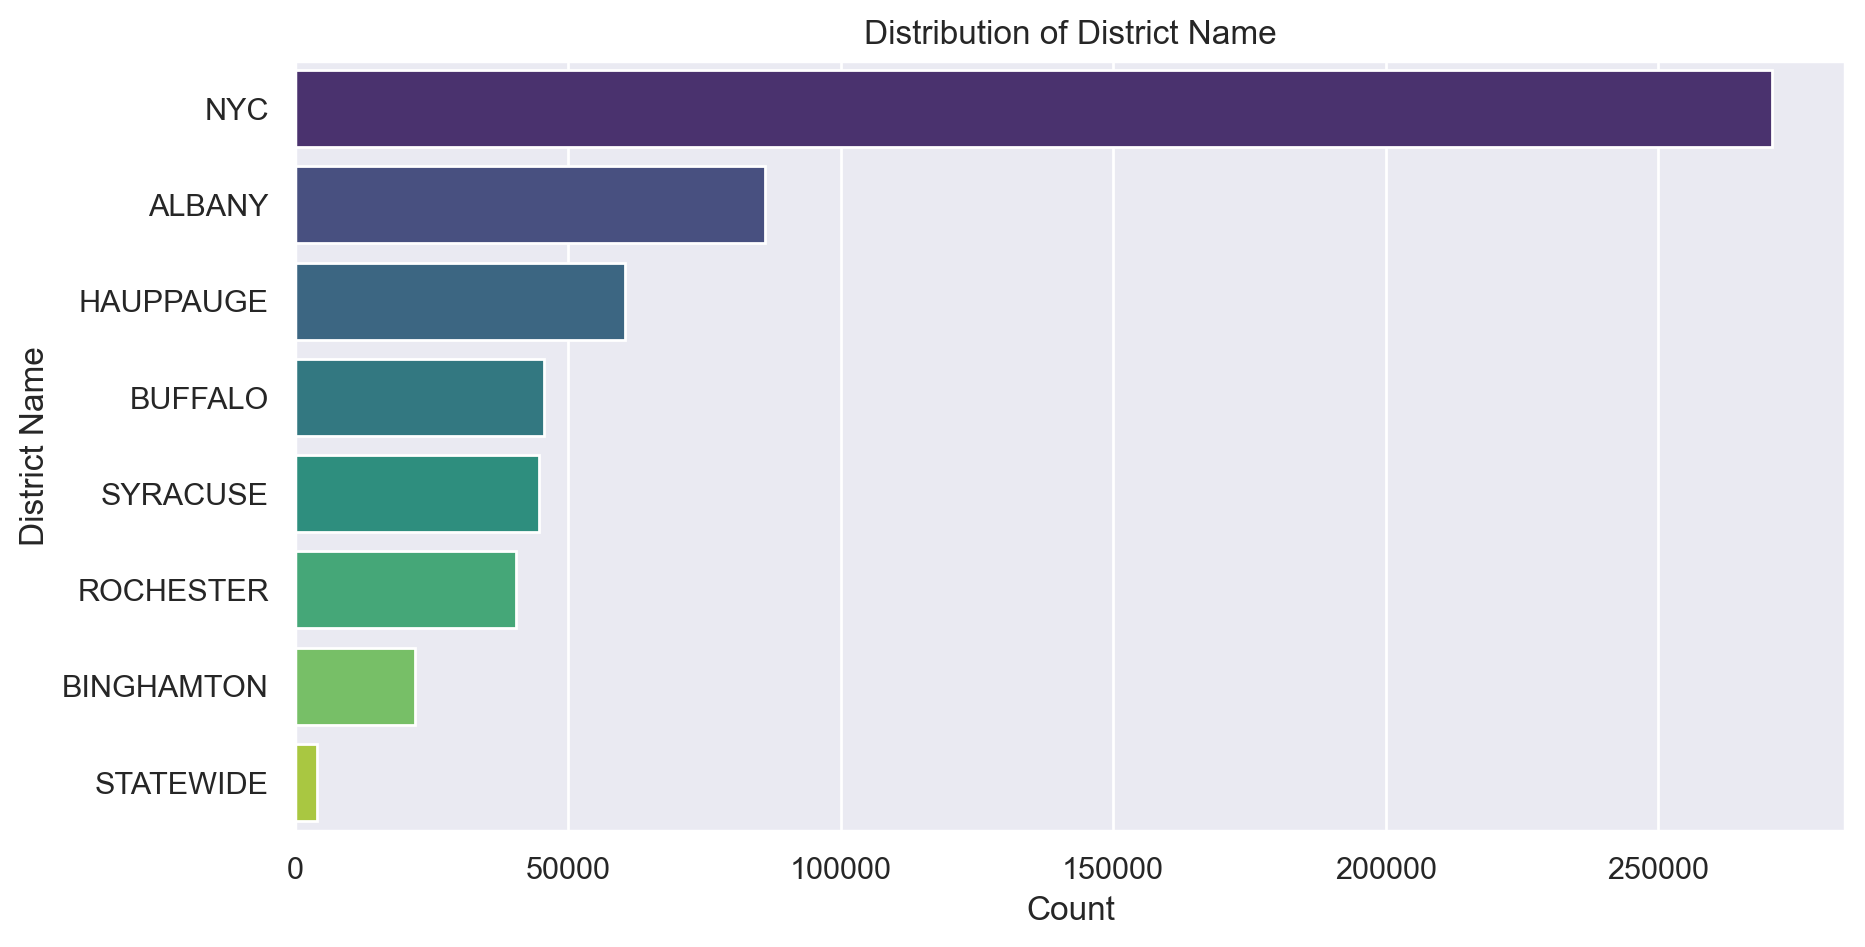

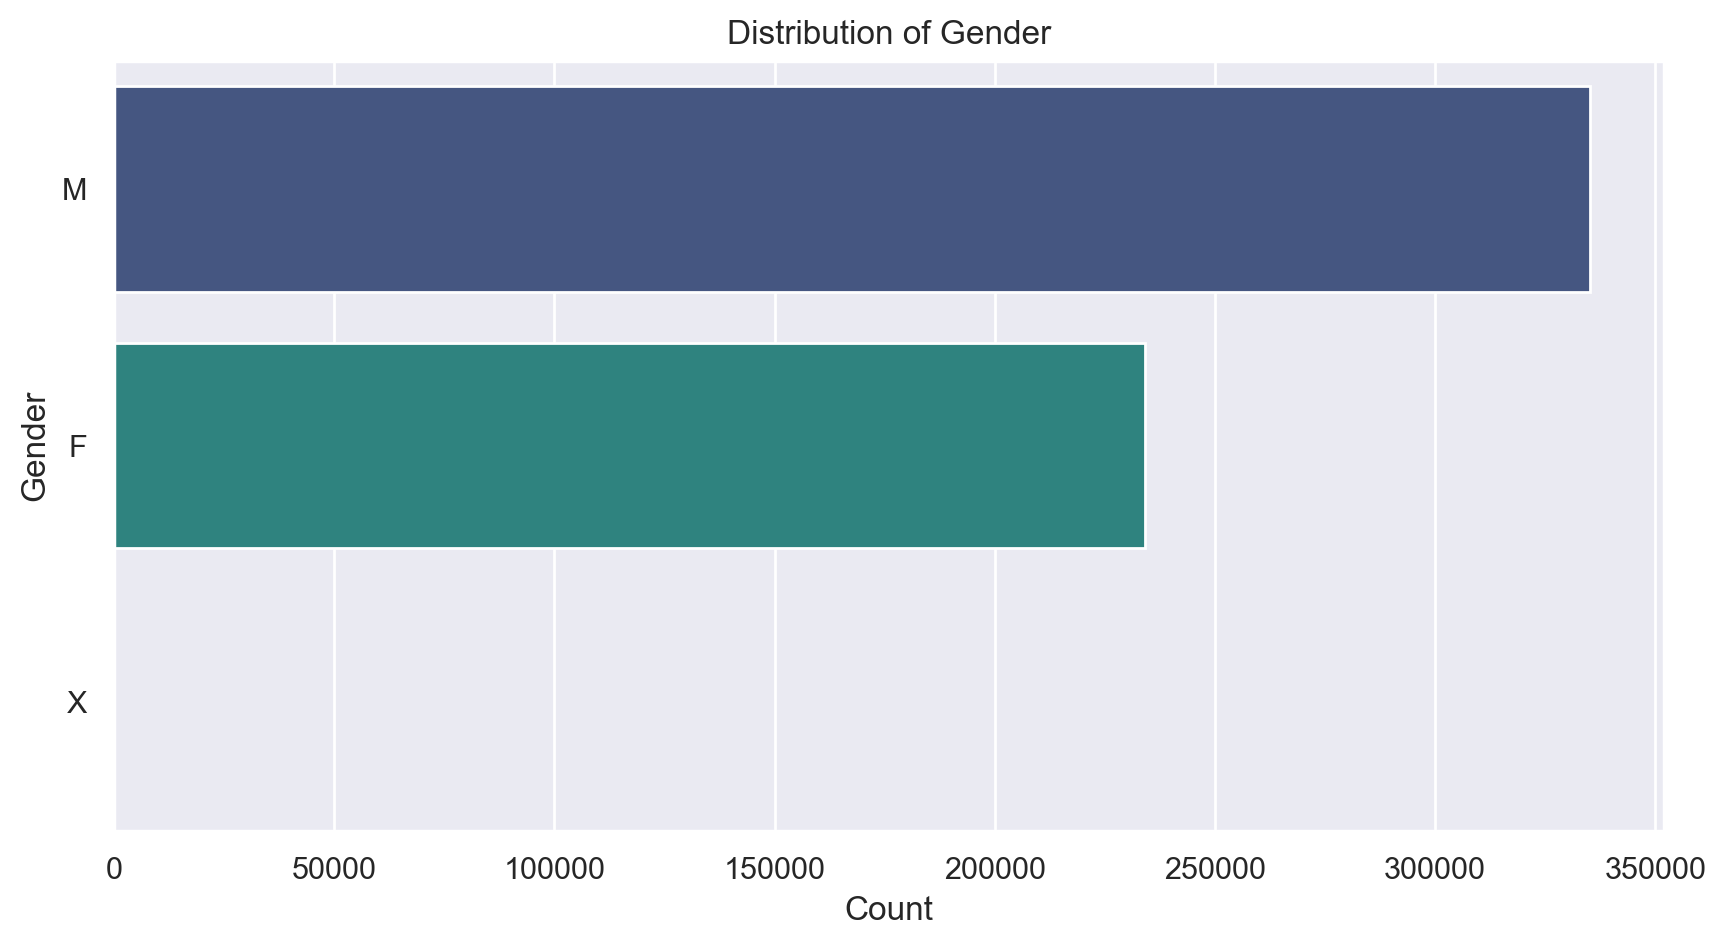

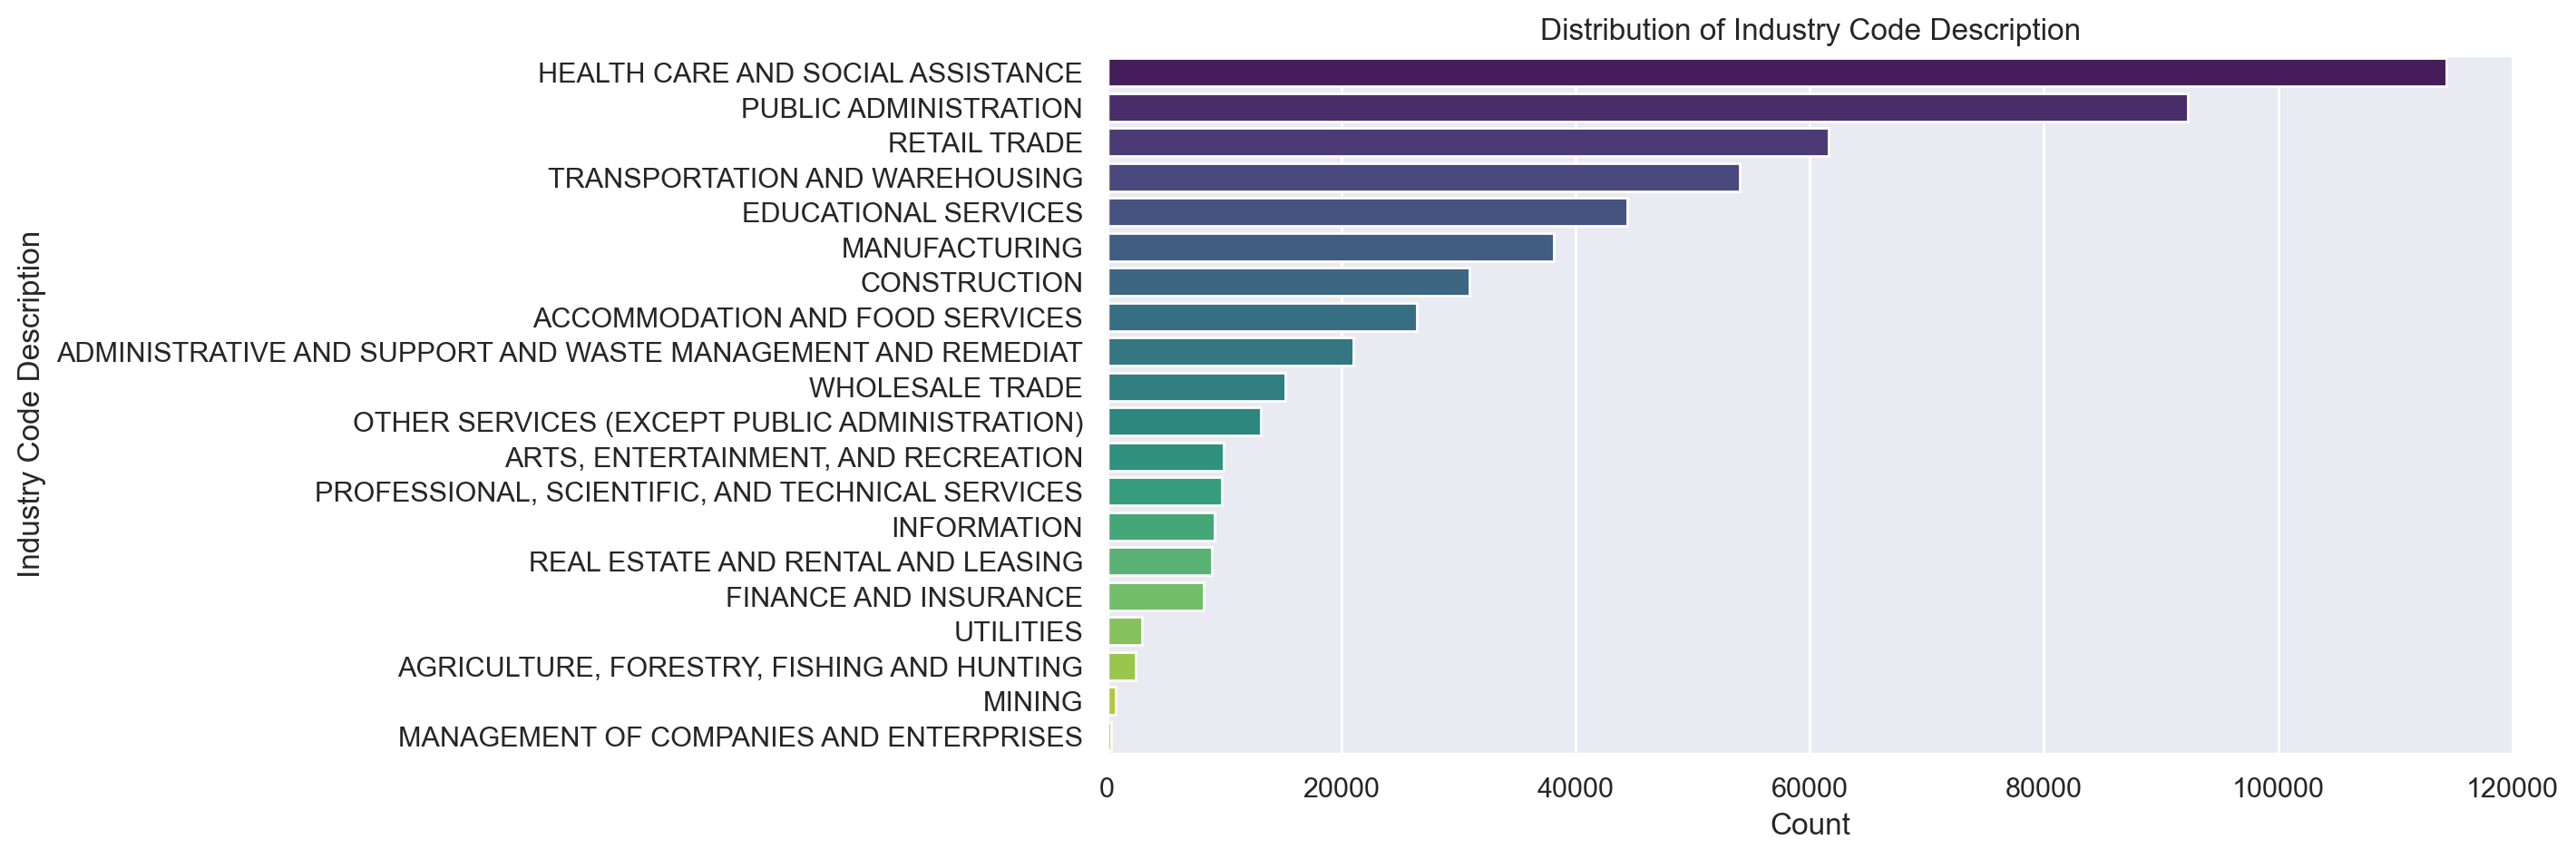

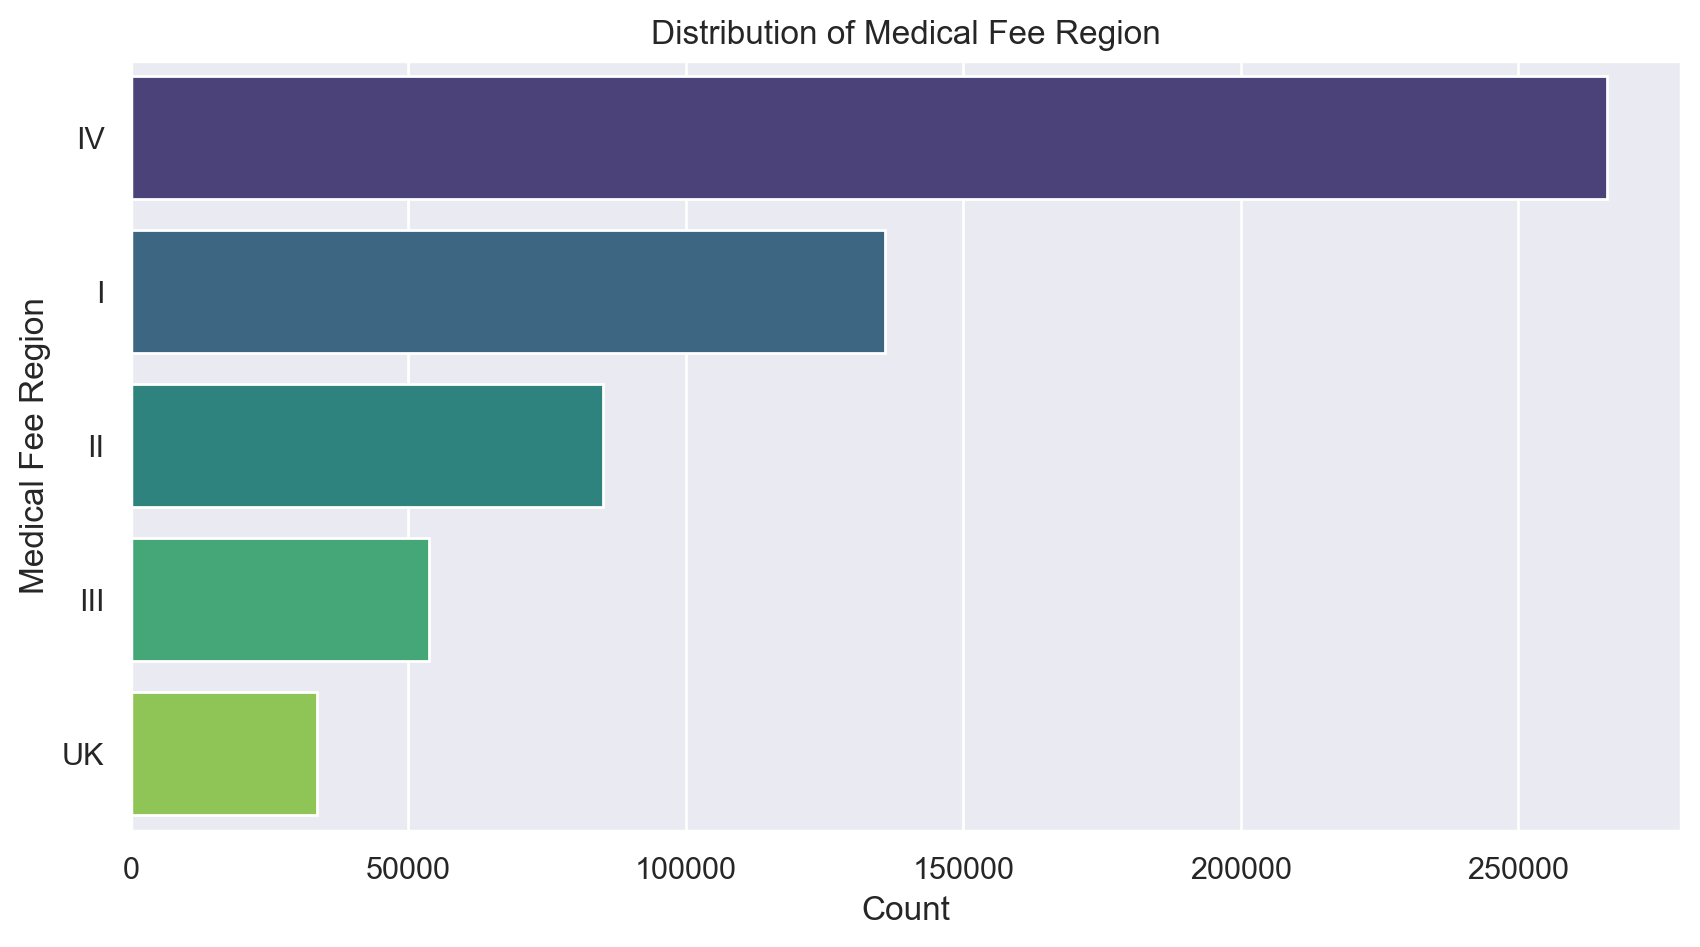

In [93]:
categorical_features = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Carrier Type',
    'Claim Injury Type',
    'COVID-19 Indicator',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=wcb_train[feature], order=wcb_train[feature].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

Even though that are some graphics that don't appear to display values for a few variables, for example, in the first graphic, the variable *X* happears a few times in the dataset
<br>
<br>
**From these visualizations we can conclude:** <br>
- Most injuries don't envolve COVID-19
- The most common values for the target variable `Claim Injury Type` are *2. NON-COMP* and *4. TEMPORARY*

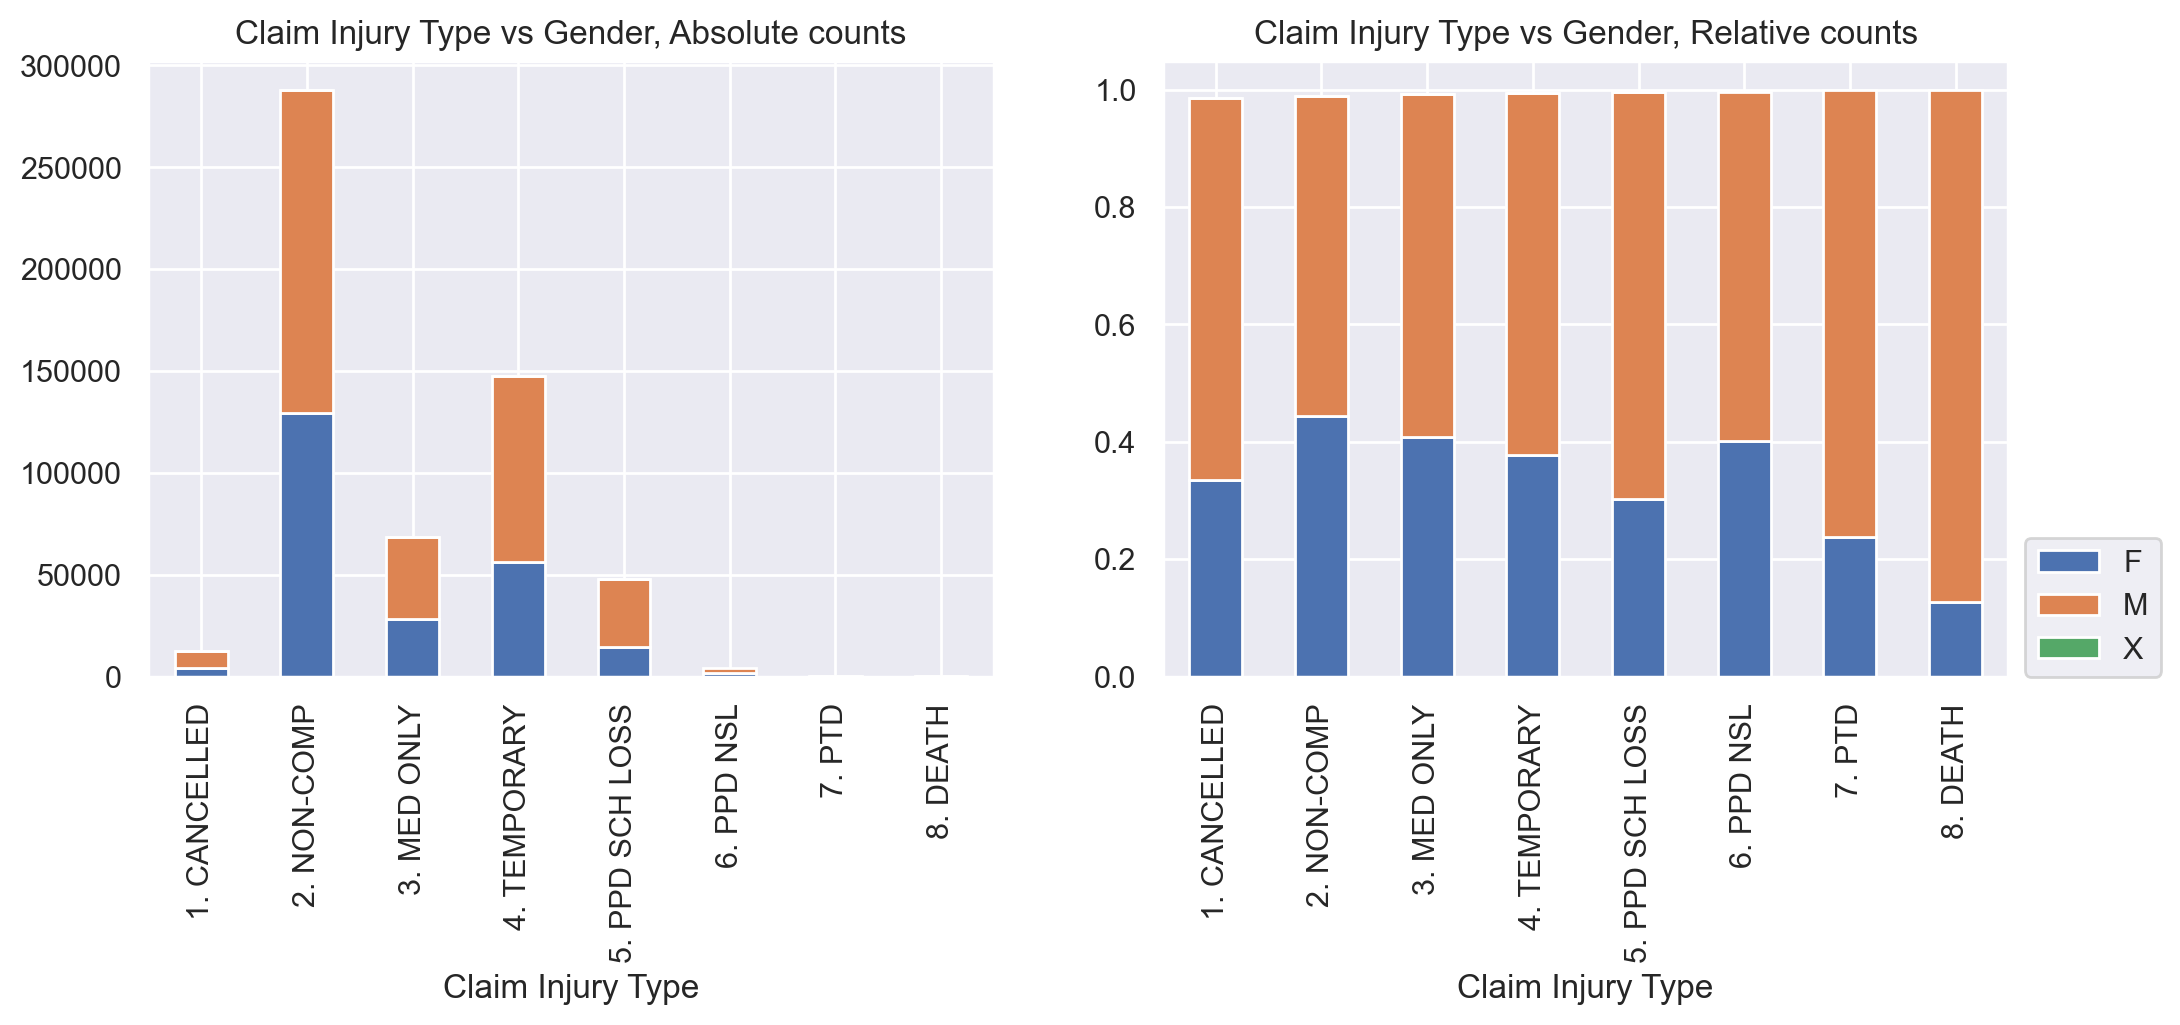

In [94]:
cat1 = 'Claim Injury Type'
cat2 = 'Gender'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs Gender, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs Gender, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

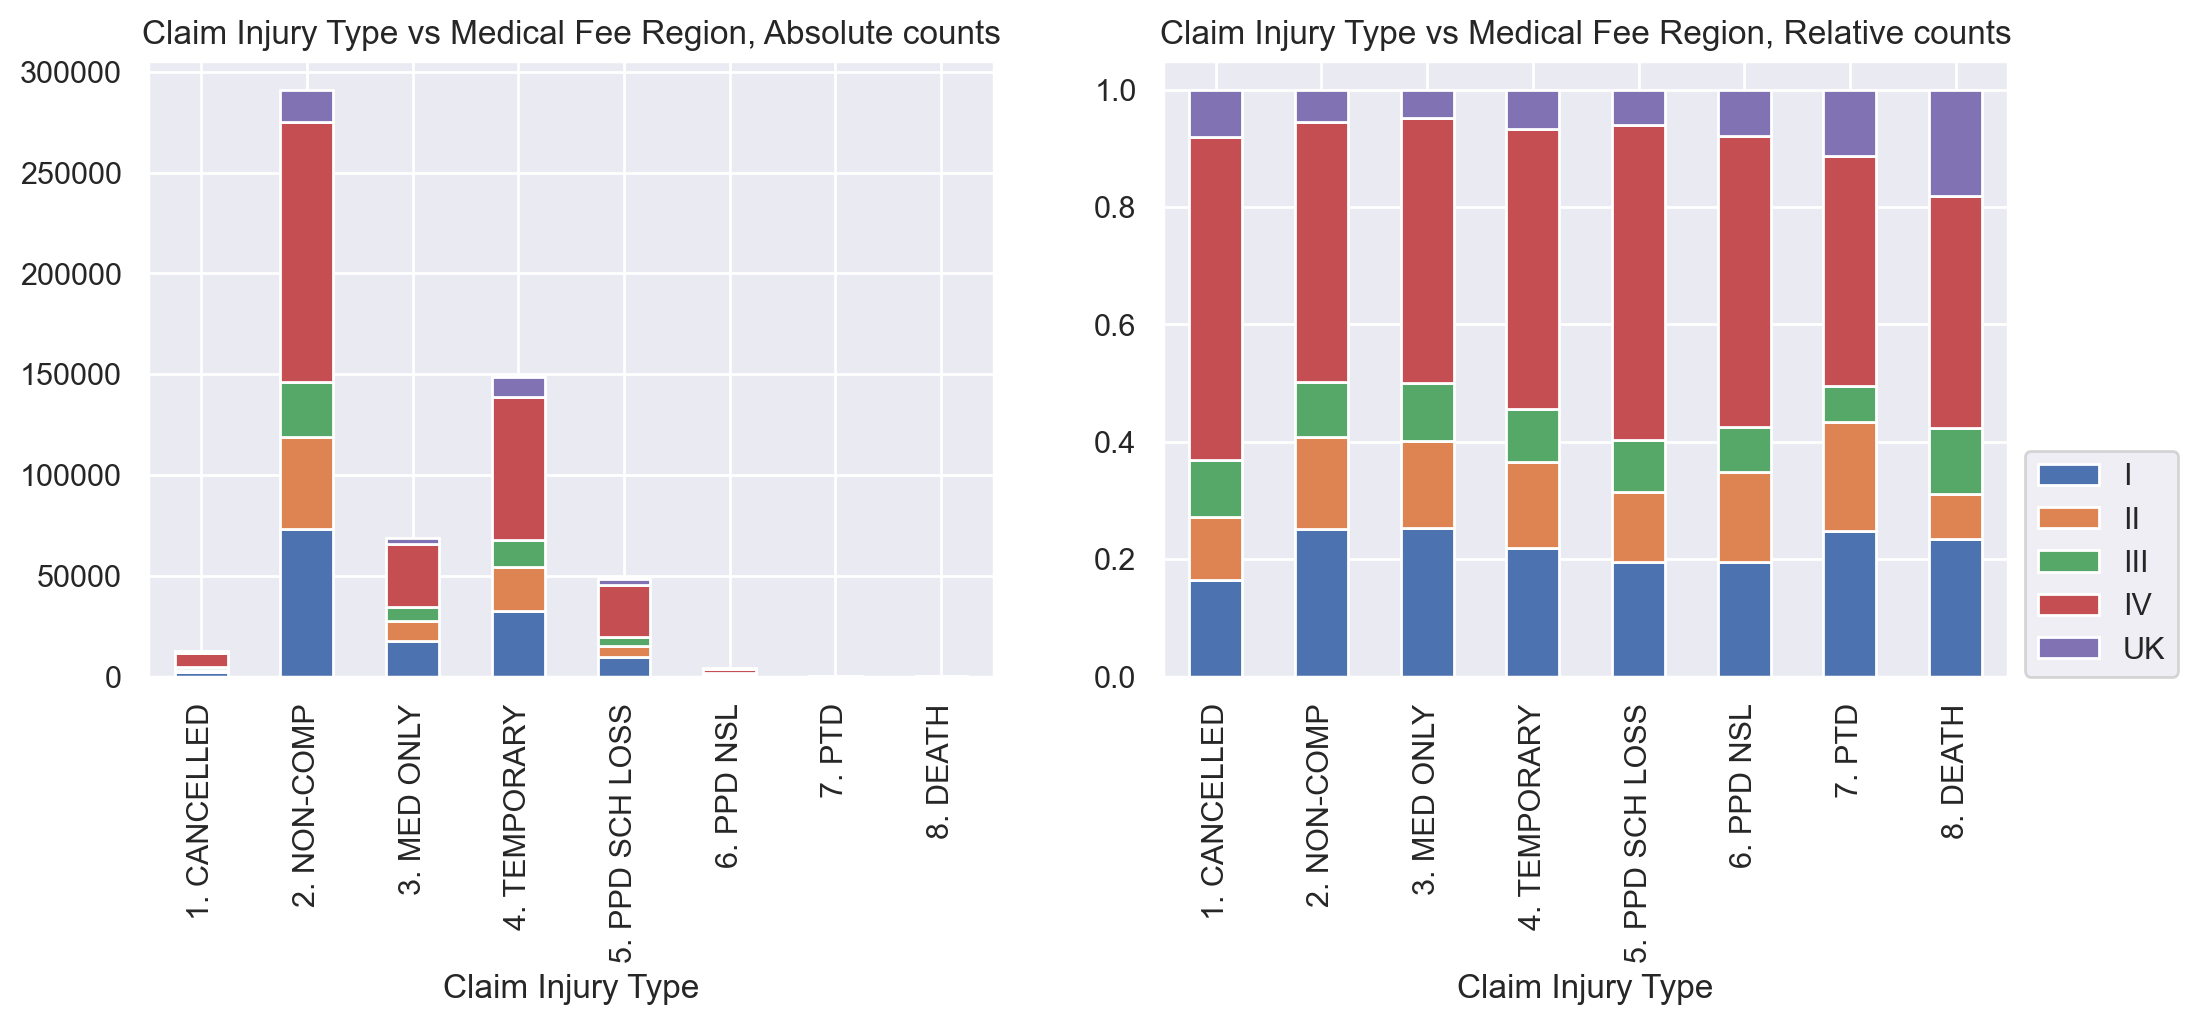

In [167]:
cat1 = 'Claim Injury Type'
cat2 = 'Medical Fee Region'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs Medical Fee Region, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs Medical Fee Region, Relative counts')
axes[1].legend(loc=(1.02,0))

plt.show()

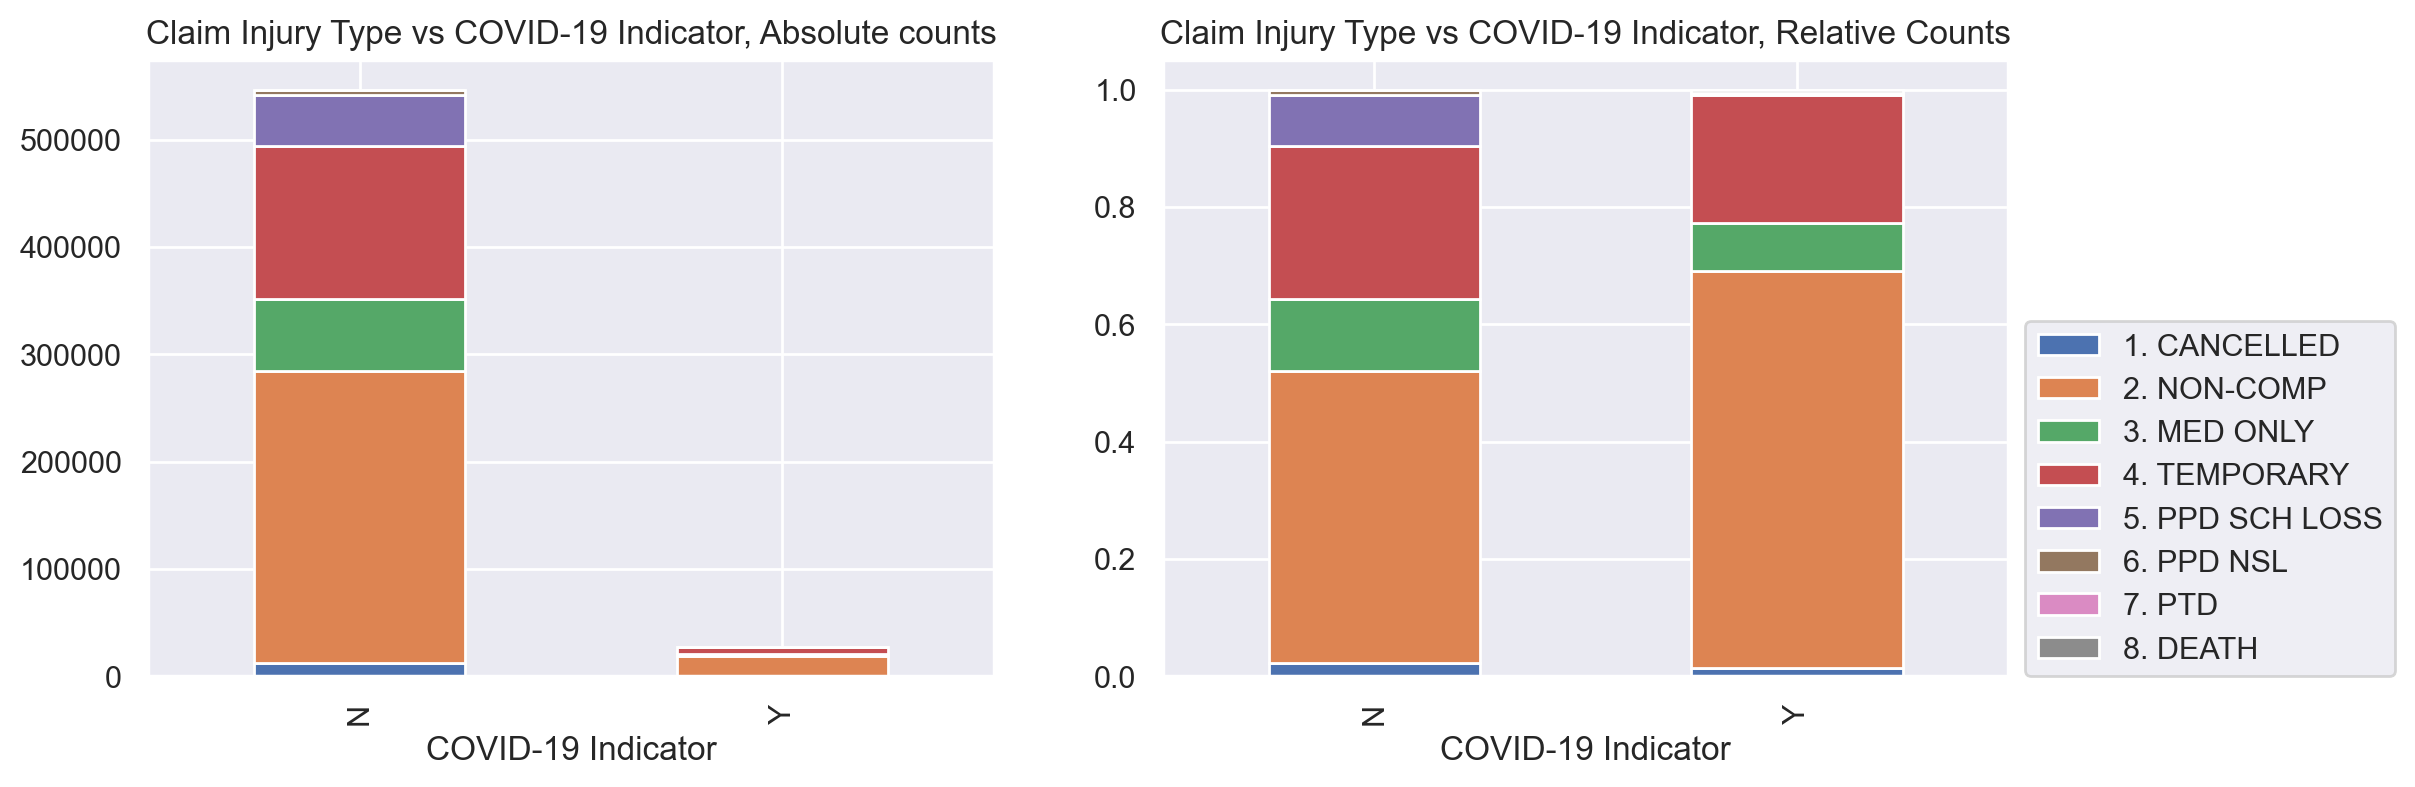

In [168]:
cat1 = 'COVID-19 Indicator'
cat2 = 'Claim Injury Type'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = wcb_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Claim Injury Type vs COVID-19 Indicator, Absolute counts')
axes[0].legend([], frameon=False)

catpc_df2 = wcb_train.groupby([cat1, cat2])[cat2].size() / wcb_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Claim Injury Type vs COVID-19 Indicator, Relative Counts')
axes[1].legend(loc=(1.02,0))

plt.show()

## 1.6 Pair-wise Relationships <a name="16-pair-wise-relationships"></a>

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>

In [95]:
wcb_train = wcb_train.dropna(subset=['Claim Injury Type'])

In [96]:
X = wcb_train.drop("Claim Injury Type", axis = 1)
y = wcb_train["Claim Injury Type"]

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y,
                                                  shuffle = True)

In [98]:
X_train.shape

(459220, 32)

## 2.1 Missing Values <a name="21-missing-values"></a>

`Step 1` **Disposable rows and columns**

Check for % non-null values for each feature:

In [99]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
31                Number of Dependents           100.000000            0
14                       District Name           100.000000            0
2       Alternative Dispute Resolution           100.000000            0
3                        Assembly Date           100.000000            0
4              Attorney/Representative           100.000000            0
30                        WCB Decision           100.000000            0
29                   Agreement Reached           100.000000            0
20                  Medical Fee Region           100.000000            0
1                        Age at Injury           100.000000            0
9                         Carrier Name           100.000000            0
10                        Carrier Type           100.000000            0
11                    Claim Identifier           100.000000            0
12                    County of Injury           100.000000            0
13                  COVID-19 Indicator           100.000000            0
0                        Accident Date            99.357824         2949
16                              Gender            99.167501         3823
18                       Industry Code            98.262706         7978
19           Industry Code Description            98.262706         7978
7                             C-2 Date            97.468969        11623
22           WCIO Cause of Injury Code            97.278211        12499
23    WCIO Cause of Injury Description            97.278211        12499
24          WCIO Nature of Injury Code            97.275162        12513
25   WCIO Nature of Injury Description            97.275162        12513
26              WCIO Part Of Body Code            97.029746        13640
27       WCIO Part Of Body Description            97.029746        13640
28                            Zip Code            95.026131        22841
5                  Average Weekly Wage            95.018074        22878
6                           Birth Year            94.918122        23337
8                             C-3 Date            32.665171       309215
15                  First Hearing Date            26.287618       338502
17                         IME-4 Count            23.153826       352893
21  OIICS Nature of Injury Description             0.000000       459220

**Drop column with all null values:**

In [100]:
X_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [101]:
X_val.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

Check how many rows with missing values there are throughout all dataset columns: <br>
Excluding `Assembly Date` and `Claim Identifier`, which have values for every row but aren't relevant enough to keep if all others are NaN

In [102]:
nan_columns = X_train.columns.drop(['Assembly Date', 'Claim Identifier'])

((X_train[nan_columns].isnull()) | (X_train[nan_columns] == 0)).all(axis=1).sum()

0

Since there are no null rows, there is no need to drop anything at this point in `X_train` nor `X_val`

In [103]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
30               Number of Dependents           100.000000            0
14                      District Name           100.000000            0
2      Alternative Dispute Resolution           100.000000            0
3                       Assembly Date           100.000000            0
4             Attorney/Representative           100.000000            0
29                       WCB Decision           100.000000            0
28                  Agreement Reached           100.000000            0
20                 Medical Fee Region           100.000000            0
1                       Age at Injury           100.000000            0
9                        Carrier Name           100.000000            0
10                       Carrier Type           100.000000            0
11                   Claim Identifier           100.000000            0
12                   County of Injury           100.000000            0
13                 COVID-19 Indicator           100.000000            0
0                       Accident Date            99.357824         2949
16                             Gender            99.167501         3823
18                      Industry Code            98.262706         7978
19          Industry Code Description            98.262706         7978
7                            C-2 Date            97.468969        11623
21          WCIO Cause of Injury Code            97.278211        12499
22   WCIO Cause of Injury Description            97.278211        12499
23         WCIO Nature of Injury Code            97.275162        12513
24  WCIO Nature of Injury Description            97.275162        12513
25             WCIO Part Of Body Code            97.029746        13640
26      WCIO Part Of Body Description            97.029746        13640
27                           Zip Code            95.026131        22841
5                 Average Weekly Wage            95.018074        22878
6                          Birth Year            94.918122        23337
8                            C-3 Date            32.665171       309215
15                 First Hearing Date            26.287618       338502
17                        IME-4 Count            23.153826       352893

In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** = 1, `OIICS Nature of Injury Description` <br>

**Turn 'C-3 Date' into a binary outcome feature, where 0  "no form received" and 1 = "at least 1 form received"**

In [104]:
X_train['C-3 Binary'] = X_train['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [105]:
X_val['C-3 Binary'] = X_val['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Turn 'First Hearing Date' into a binary outcome feature, where 0 = "there was no hearing" and 1 = "there was a hearing"**

In [106]:
X_train['First Hearing Binary'] = X_train['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [107]:
X_val['First Hearing Binary'] = X_val['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Change in 'IME-4 Count' null values**

Since `IME-4 Count` has only integers different from 0, we are assuming that all null values mean that an independent medical evaluation wasn't requested, therefore all null values will be changed to 0's.

In [108]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

In [109]:
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)

In [110]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
32               First Hearing Binary           100.000000            0
9                        Carrier Name           100.000000            0
20                 Medical Fee Region           100.000000            0
14                      District Name           100.000000            0
13                 COVID-19 Indicator           100.000000            0
12                   County of Injury           100.000000            0
11                   Claim Identifier           100.000000            0
10                       Carrier Type           100.000000            0
28                  Agreement Reached           100.000000            0
17                        IME-4 Count           100.000000            0
29                       WCB Decision           100.000000            0
30               Number of Dependents           100.000000            0
31                         C-3 Binary           100.000000            0
4             Attorney/Representative           100.000000            0
3                       Assembly Date           100.000000            0
2      Alternative Dispute Resolution           100.000000            0
1                       Age at Injury           100.000000            0
0                       Accident Date            99.357824         2949
16                             Gender            99.167501         3823
18                      Industry Code            98.262706         7978
19          Industry Code Description            98.262706         7978
7                            C-2 Date            97.468969        11623
21          WCIO Cause of Injury Code            97.278211        12499
22   WCIO Cause of Injury Description            97.278211        12499
23         WCIO Nature of Injury Code            97.275162        12513
24  WCIO Nature of Injury Description            97.275162        12513
25             WCIO Part Of Body Code            97.029746        13640
26      WCIO Part Of Body Description            97.029746        13640
27                           Zip Code            95.026131        22841
5                 Average Weekly Wage            95.018074        22878
6                          Birth Year            94.918122        23337
8                            C-3 Date            32.665171       309215
15                 First Hearing Date            26.287618       338502

# FALTA EXPLICAR ISTO

In [111]:
X_train['Days to assemble claim'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

In [112]:
X_val['Days to assemble claim'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

In [113]:
X_train['Days to assemble claim'].describe()

count    456271.000000
mean         82.390408
std         603.319475
min       -1127.000000
25%           5.000000
50%          10.000000
75%          25.000000
max       21503.000000
Name: Days to assemble claim, dtype: float64

In [114]:
X_train['Accident Date'] = X_train.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [115]:
X_val['Accident Date'] = X_val.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [116]:
X_train['Days to assemble claim'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

In [117]:
X_val['Days to assemble claim'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

**Most of the `Birth Year` values can be calculated by subtracting `Accident Date` with `Age at Injury`, since `Accident Date` still has some null values**

In [118]:
X_train['Birth Year'] = X_train['Birth Year'].fillna(X_train['Accident Date'].dt.year - X_train['Age at Injury'])

In [119]:
X_val['Birth Year'] = X_val['Birth Year'].fillna(X_val['Accident Date'].dt.year - X_val['Age at Injury'])

**Since the median value of the diference between `Assembly Date` and `C-2 Date` is 0 days and the mean is 4 days, we believe that the best approach is to fill the null values of the `C-2 Date` equal to the values in `Assembly Date`** <br>
We choose `Assembly Date` to replace the null values because these two variables have high correlation between them (we show this foward in the code)

In [120]:
X_train['Days to receipt report'] = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days

In [121]:
X_val['Days to receipt report'] = (X_val['Assembly Date'] - X_val['C-2 Date']).dt.days

In [122]:
X_train['Days to receipt report'].describe()

count    447597.000000
mean          3.978968
std         260.624504
min       -1395.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9614.000000
Name: Days to receipt report, dtype: float64

In [123]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Assembly Date'])

In [124]:
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Assembly Date'])

In [125]:
X_train['Days to receipt report'] = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days

In [126]:
X_val['Days to receipt report'] = (X_val['Assembly Date'] - X_val['C-2 Date']).dt.days

**Since the median value of `Average Weekly Wage` is 0, and more than half of the values of this variable are also 0, we think that replacing null values with the median is the most correct approach** <br>
In this case, the mean is a reasonable value considering the real world conditions, however the values range from 0 to 2.8 milion, reducing the credibility of the mean

In [127]:
X_train['Average Weekly Wage'].describe()

count    4.363420e+05
mean     4.949997e+02
std      6.768543e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.400000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [128]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(0)

In [129]:
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(0)

In [130]:
X_train = X_train.dropna(subset=['WCIO Part Of Body Description'])
X_train = X_train.dropna(subset=['WCIO Cause of Injury Description'])
X_train = X_train.dropna(subset=['WCIO Nature of Injury Description'])
X_train = X_train.dropna(subset=['Industry Code'])

y_train = y_train.loc[X_train.index]

In [131]:
X_val = X_val.dropna(subset=['WCIO Part Of Body Description'])
X_val = X_val.dropna(subset=['WCIO Cause of Injury Description'])
X_val = X_val.dropna(subset=['WCIO Nature of Injury Description'])
X_val = X_val.dropna(subset=['Industry Code'])

y_val = y_val.loc[X_val.index]

In [132]:
X_train.shape

(444027, 35)

In [133]:
y_train.shape

(444027,)

**Transform the variable `Gender` into numeric where 0 is Male, 1 is Female and 2 is Non-Binary, with the handling of the null values with the mode, which is male in this case**

In [134]:
X_train['Gender'] = X_train['Gender'].fillna(0)

In [135]:
X_val['Gender'] = X_val['Gender'].fillna(0)

# FALTA EXPLICAR ISTO

In [136]:
X_train['Zip Code'] = X_train['Zip Code'].fillna('Unknown')

In [137]:
X_val['Zip Code'] = X_val['Zip Code'].fillna('Unknown')

In [138]:
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

non_null_df.sort_values('Non-Null Percentage', ascending=False)    

Variable  Non-Null Percentage  Null Values
0                       Accident Date           100.000000            0
26      WCIO Part Of Body Description           100.000000            0
20                 Medical Fee Region           100.000000            0
21          WCIO Cause of Injury Code           100.000000            0
22   WCIO Cause of Injury Description           100.000000            0
23         WCIO Nature of Injury Code           100.000000            0
24  WCIO Nature of Injury Description           100.000000            0
25             WCIO Part Of Body Code           100.000000            0
27                           Zip Code           100.000000            0
18                      Industry Code           100.000000            0
28                  Agreement Reached           100.000000            0
29                       WCB Decision           100.000000            0
30               Number of Dependents           100.000000            0
31                         C-3 Binary           100.000000            0
32               First Hearing Binary           100.000000            0
33             Days to assemble claim           100.000000            0
19          Industry Code Description           100.000000            0
17                        IME-4 Count           100.000000            0
1                       Age at Injury           100.000000            0
16                             Gender           100.000000            0
2      Alternative Dispute Resolution           100.000000            0
3                       Assembly Date           100.000000            0
4             Attorney/Representative           100.000000            0
5                 Average Weekly Wage           100.000000            0
6                          Birth Year           100.000000            0
7                            C-2 Date           100.000000            0
9                        Carrier Name           100.000000            0
10                       Carrier Type           100.000000            0
11                   Claim Identifier           100.000000            0
12                   County of Injury           100.000000            0
13                 COVID-19 Indicator           100.000000            0
14                      District Name           100.000000            0
34             Days to receipt report           100.000000            0
8                            C-3 Date            32.022152       301840
15                 First Hearing Date            26.782155       325107

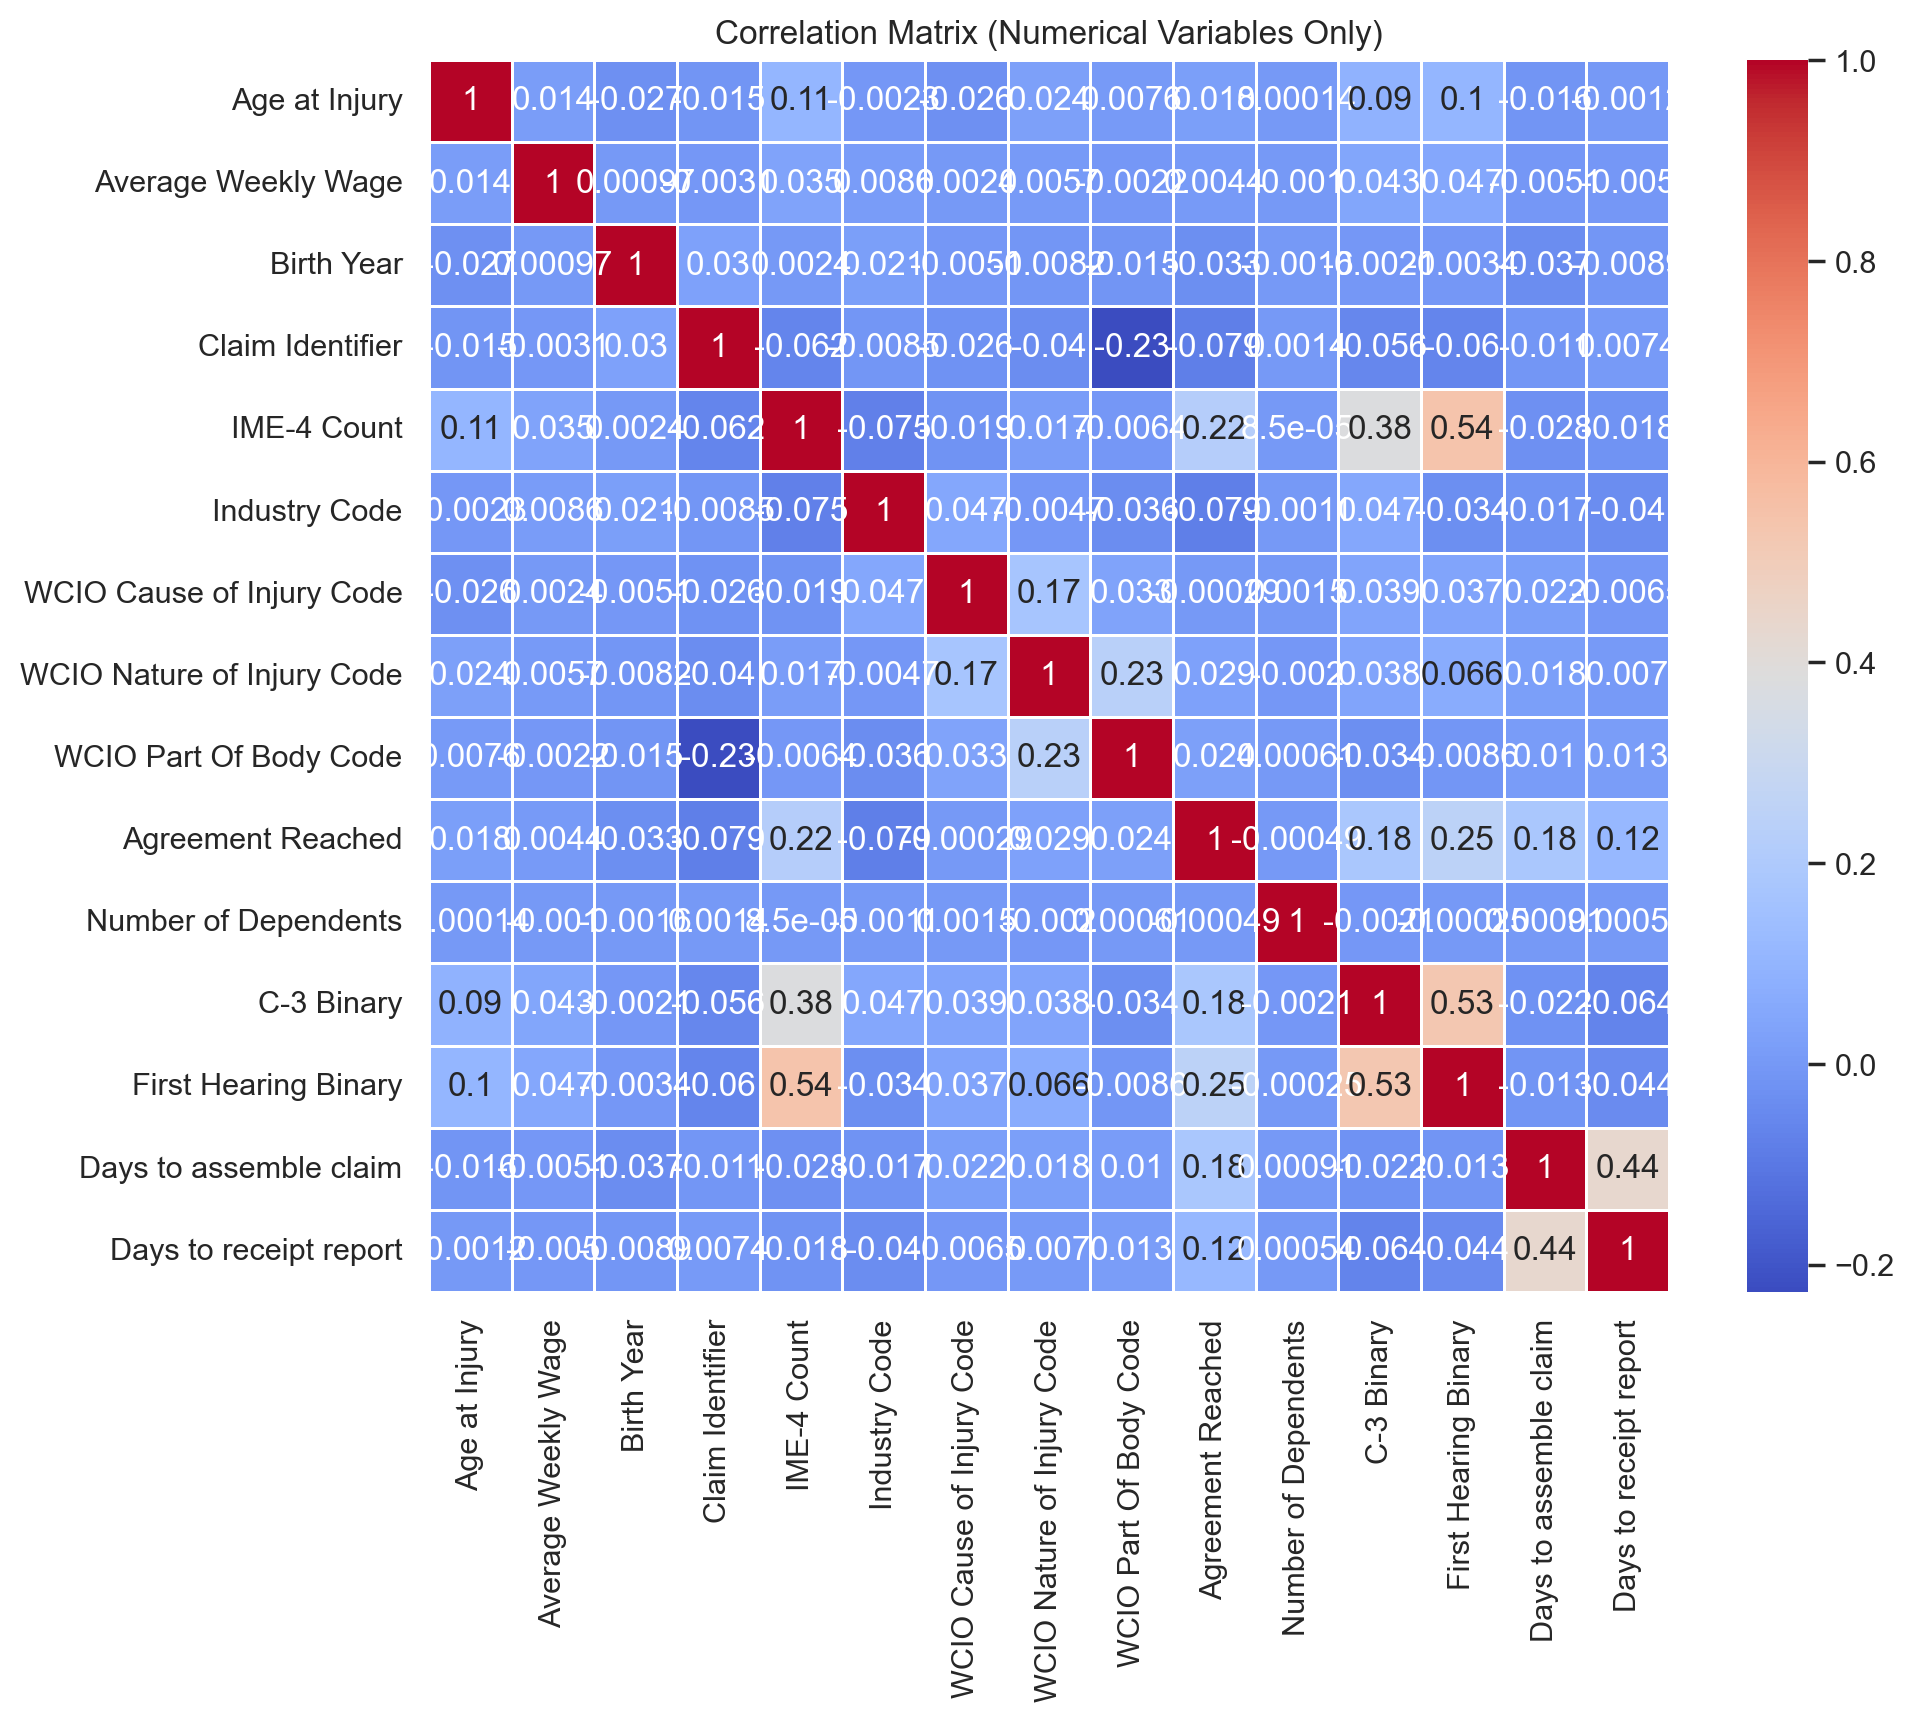

In [139]:
# Step 1: Select only numerical columns
numerical_df = X_train.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

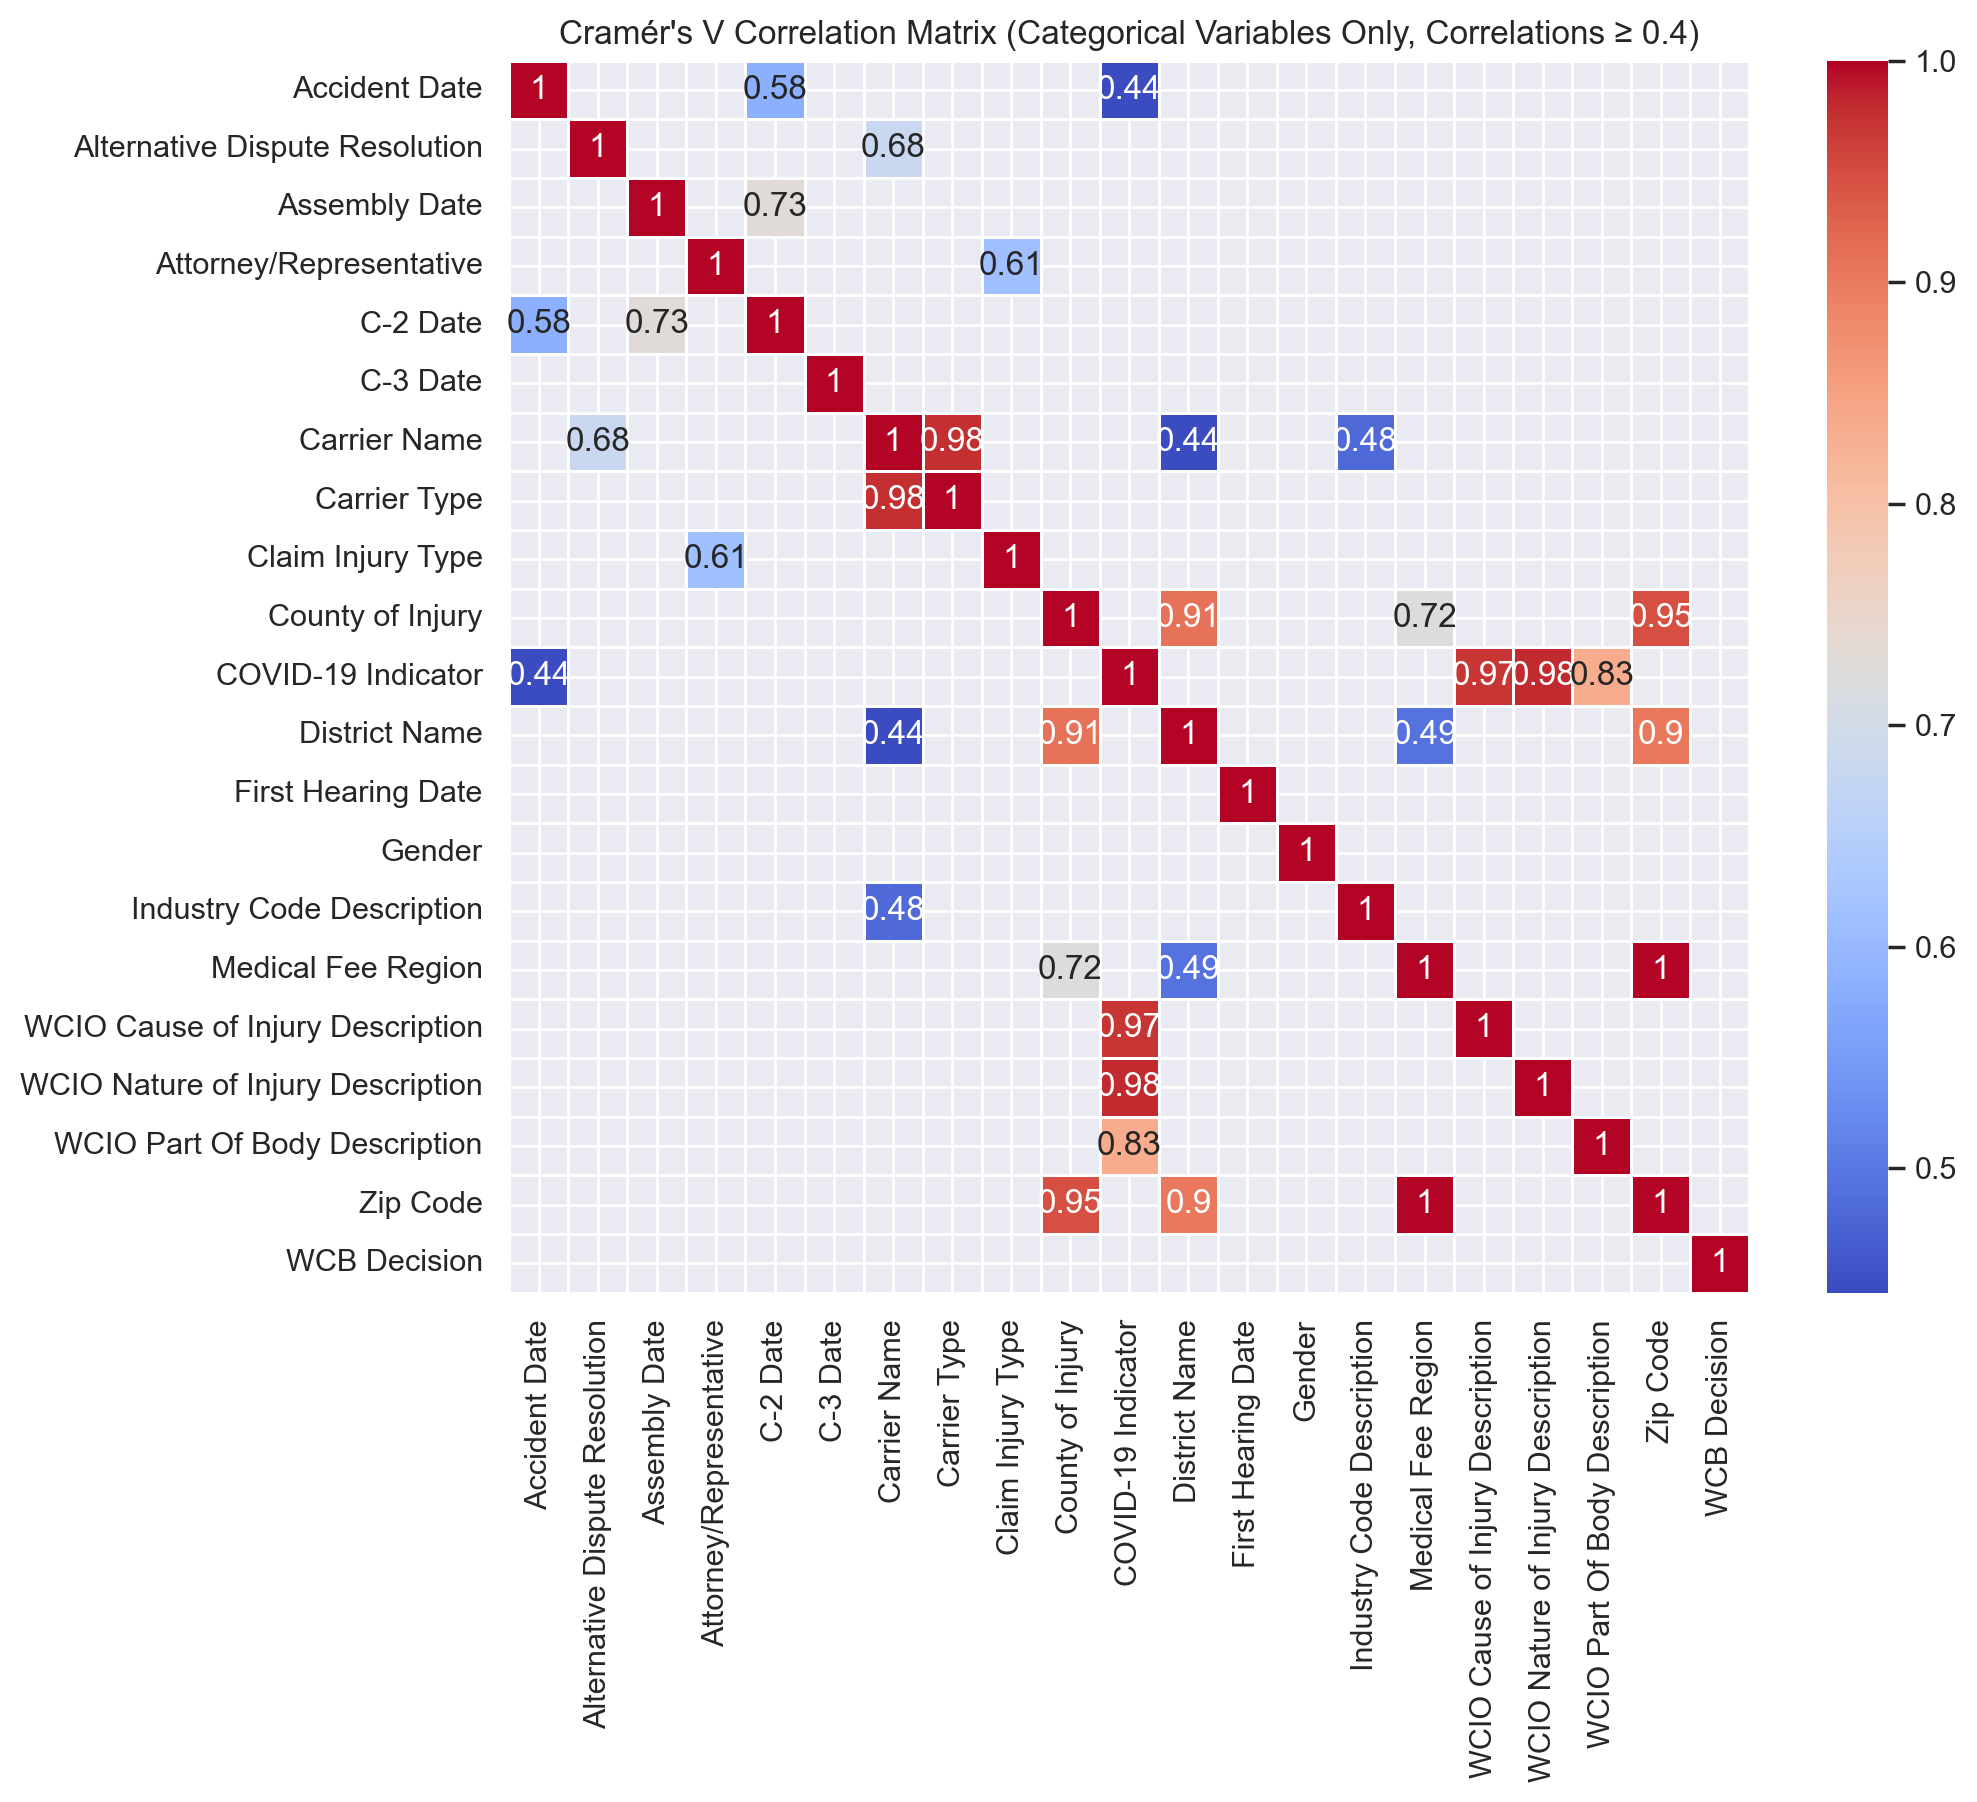

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 1: Select only categorical columns
categorical_df = wcb_train.select_dtypes(include=['object', 'datetime64[ns]'])

# Step 2: Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Step 3: Create an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((categorical_df.shape[1], categorical_df.shape[1])), 
                                columns=categorical_df.columns, 
                                index=categorical_df.columns)

# Step 4: Calculate Cramér's V for each pair of categorical variables
for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = 1  # Set diagonal to 1

# Step 5: Apply a mask for values below 0.4
mask = (cramers_v_matrix > -0.4) & (cramers_v_matrix < 0.4)

# Step 6: Visualize the correlation matrix with masking
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Display the plot
plt.title('Cramér\'s V Correlation Matrix (Categorical Variables Only, Correlations ≥ 0.4)')
plt.show()


## 2.2  Duplicates <a name="23-Duplicates"></a>

In [141]:
X_train[['Industry Code', 'Industry Code Description']].nunique()

X_train.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
wcb_unicos = X_train.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
descricao_repetidas = wcb_unicos['Industry Code Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
descricao_repetidas[descricao_repetidas > 1]


# X_train[X_train['Industry Code Description'].isin(['MANUFACTURING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]
X_train[X_train['Industry Code Description'].isin(['TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]

X_train['Industry Code'] = X_train['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})
X_val['Industry Code'] = X_val['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [142]:
X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].nunique()

X_train.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
wcb_unicos = X_train.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
descricao_repetidas = wcb_unicos['WCIO Cause of Injury Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
descricao_repetidas[descricao_repetidas > 1]

#X_train[X_train['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED', 'REPETITIVE MOTION'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

X_train[X_train['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]

X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].replace({79: 17, 66: 17, 97: 94})
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].replace({79: 17, 66: 17, 97: 94})

## 2.3 Outliers <a name="23-outliers"></a>

To handle the outliears in `Age at Injury` we though about changing 1% of the values, 0.5% to each side and replace its value to the 99.5% percentile and 0.05% percentile, making every age higher than 75 to be changed to 75 and every age below 16 to be changed to 16. However, we thought that 75 was to low to the data that we had and to the reality of the world, therefore we thought that 85 was more appropriate to this case. This value is also closer to the first outlier in all visualizations related to `Age at Injury`

In [143]:
print(X_train['Age at Injury'].quantile(0.995))
print(X_train['Age at Injury'].quantile(0.005))

X_train['Age at Injury'] = X_train.apply(lambda x: 16 if 16 >= x['Age at Injury'] else x['Age at Injury'], axis=1)
X_train['Age at Injury'] = X_train.apply(lambda x: 85 if 85 <= x['Age at Injury'] else x['Age at Injury'], axis=1)

75.0
16.0


Update the `Birth Year` since the ages have been updated

In [144]:
X_train['Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']

For `Accident Date` we were happy with the upper bound value of this variable and saw no need to change it. That was not the case for the lower bound, and we thought that the IQR method was the most appropiate in this case. With this new value lower_bound we filtered all the data to remove any row where the `Accident Date` was before the threeshold.

In [145]:
Q1 = X_train['Accident Date'].quantile(0.25)
Q3 = X_train['Accident Date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = pd.to_datetime((Q1 - pd.Timedelta(days=1.5 * IQR.days)).strftime('%Y-%m-%d'))

X_train = X_train[(X_train['Accident Date'] >= lower_bound)]

y_train = y_train.loc[X_train.index]

# TRATAR WEEKLY WAGE

In [146]:
'''box_plot_features = ['Age at Injury', 'Average Weekly Wage', 'Claim Injury Type', 'First Hearing Date', 'Accident Date', 'Assembly Date']


sns.set()
fig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))
for ax, feat in zip(axes.flatten(), box_plot_features):
    sns.boxplot(x=wcb[feat], ax=ax)

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()'''

'box_plot_features = [\'Age at Injury\', \'Average Weekly Wage\', \'Claim Injury Type\', \'First Hearing Date\', \'Accident Date\', \'Assembly Date\']\n\n\nsns.set()\nfig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))\nfor ax, feat in zip(axes.flatten(), box_plot_features):\n    sns.boxplot(x=wcb[feat], ax=ax)\n\ntitle = "Numeric Variables\' Box Plots"\nplt.suptitle(title)\nplt.show()'

## 2.5 Agreggations <a name="23-Agregations"></a>

## 2.6 Feature Engineering <a name="23-Feature Engineering"></a>

In [147]:
X_train['Alternative Dispute Resolution'] = X_train['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [148]:
X_val['Alternative Dispute Resolution'] = X_val['Alternative Dispute Resolution'].replace({'N': 0, 'Y': 1})

In [149]:
X_train['Attorney/Representative'] = X_train['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [150]:
X_val['Attorney/Representative'] = X_val['Attorney/Representative'].replace({'N': 0, 'Y': 1})

In [151]:
X_train['Carrier Type'] = X_train['Carrier Type'].replace({
    '1A. PRIVATE': 1,
    '2A. SIF': 2,
    '3A. SELF PUBLIC': 3,
    '4A. SELF PRIVATE': 4,
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5,
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
    '5D. SPECIAL FUND - UNKNOWN': 5,
    'UNKNOWN': 0
}).astype('Int64')

In [152]:
y_train = y_train.replace({
    '1. CANCELLED': 1, 
    '2. NON-COMP': 2, 
    '3. MED ONLY': 3, 
    '4. TEMPORARY': 4, 
    '5. PPD SCH LOSS': 5, 
    '6. PPD NSL': 6, 
    '7. PTD': 7, 
    '8. DEATH': 8
})

In [153]:
y_val = y_val.replace({
    '1. CANCELLED': 1, 
    '2. NON-COMP': 2, 
    '3. MED ONLY': 3, 
    '4. TEMPORARY': 4, 
    '5. PPD SCH LOSS': 5, 
    '6. PPD NSL': 6, 
    '7. PTD': 7, 
    '8. DEATH': 8
})

In [154]:
X_train['COVID-19 Indicator'] = X_train['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [155]:
X_val['COVID-19 Indicator'] = X_val['COVID-19 Indicator'].replace({'N': 0, 'Y': 1})

In [156]:
X_train['District Name'] = X_train['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [157]:
X_val['District Name'] = X_val['District Name'].replace({
    'NYC': 1,
    'ALBANY': 2,
    'HAUPPAUGE': 3,
    'BUFFALO': 4,
    'SYRACUSE': 5,
    'ROCHESTER': 6,
    'BINGHAMTON': 7,
    'STATEWIDE': 8
})

In [158]:
X_train['Gender'] = X_train['Gender'].replace({'M': 0, 'F': 1, 'X': 2})

In [159]:
X_val['Gender'] = X_val['Gender'].replace({'M': 0, 'F': 1, 'X': 2})

In [160]:
X_train['Medical Fee Region'] = X_train['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})

In [161]:
X_val['Medical Fee Region'] = X_val['Medical Fee Region'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'UK': 5
})

# FALTA EXPLICAR ISTO

In [162]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [163]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace(-9, 9)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace(-9, 9)

Create a variable to store the *Month* and the *Year* of some important dates, so that this information can be user later in the models

In [164]:
X_train['Accident Month'] = X_train['Accident Date'].dt.month.astype('Int64')
X_train['Accident Year'] = X_train['Accident Date'].dt.year.astype('Int64')

X_train['Assembly Month'] = X_train['Assembly Date'].dt.month.astype('Int64')
X_train['Assembly Year'] = X_train['Assembly Date'].dt.year.astype('Int64')

X_train['C-2 Month'] = X_train['C-2 Date'].dt.month.astype('Int64')
X_train['C-2 Year'] = X_train['C-2 Date'].dt.year.astype('Int64')

In [165]:
X_val['Accident Month'] = X_val['Accident Date'].dt.month.astype('Int64')
X_val['Accident Year'] = X_val['Accident Date'].dt.year.astype('Int64')

X_val['Assembly Month'] = X_val['Assembly Date'].dt.month.astype('Int64')
X_val['Assembly Year'] = X_val['Assembly Date'].dt.year.astype('Int64')

X_val['C-2 Month'] = X_val['C-2 Date'].dt.month.astype('Int64')
X_val['C-2 Year'] = X_val['C-2 Date'].dt.year.astype('Int64')

Use an encoder to transform these categorical variables into numerical variables

In [170]:
encoder = OrdinalEncoder()

X_train["County of Injury"] = encoder.fit_transform(X_train[["County of Injury"]])
X_val["County of Injury"] = encoder.fit_transform(X_val[["County of Injury"]])

In [172]:
label_encoder = LabelEncoder()

X_train['Carrier Name'] = label_encoder.fit_transform(X_train['Carrier Name'])
X_val['Carrier Name'] = label_encoder.fit_transform(X_val['Carrier Name'])

## 2.7 New Variables <a name="11-importing-libraries"></a>

`Accident Month` - represents the month of the accident <br>
`Accident Year` - represents the year of the accident <br>
`Assembly Month` - represents the month of the assembly <br>
`Assembly Year` - represents the year of the assembly <br>
`C-2 Month` - represents the month of the C-2 form <br>
`C-2 Year` - represents the year of the C-2 form <br>
`Days to receipt report` - represents the number of days that took to fill the C-2 form since the assembly date <br>
`Days to assemble claim` - repsents the number of days that took to assemble the claim since the day of the accident

In [173]:
X_train = X_train.drop(columns=["Number of Dependents", "WCB Decision", "Industry Code Description", "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", "WCIO Part Of Body Description"])

In [174]:
X_val = X_val.drop(columns=["Number of Dependents", "WCB Decision", "Industry Code Description", "WCIO Cause of Injury Description", "WCIO Nature of Injury Description", "WCIO Part Of Body Description"])

In [175]:
""" # Listar as colunas que devem ser mantidas com tipos originais
cols_to_exclude = ['Accident Date', 'Assembly Date', 'C-2 Date', 'Zip Code', 'Average Weekly Wage']

# Converter todas as outras colunas para Int64
for col in X_train.columns:
    if col not in cols_to_exclude:
        X_train[col] = X_train[col].astype('Int64')

# Verificar os tipos de dados após a conversão
print(X_train.dtypes)
 """

" # Listar as colunas que devem ser mantidas com tipos originais\ncols_to_exclude = ['Accident Date', 'Assembly Date', 'C-2 Date', 'Zip Code', 'Average Weekly Wage']\n\n# Converter todas as outras colunas para Int64\nfor col in X_train.columns:\n    if col not in cols_to_exclude:\n        X_train[col] = X_train[col].astype('Int64')\n\n# Verificar os tipos de dados após a conversão\nprint(X_train.dtypes)\n "

In [176]:
X_train = X_train.drop(columns=["Zip Code"])

In [177]:
X_val = X_val.drop(columns=["Zip Code"])

In [178]:
print(X_train.nunique())

Accident Date                       1672
Age at Injury                         70
Alternative Dispute Resolution         2
Assembly Date                        889
Attorney/Representative                2
Average Weekly Wage               102469
Birth Year                            74
C-2 Date                            1437
C-3 Date                            1578
Carrier Name                        1901
Carrier Type                           6
Claim Identifier                  440401
County of Injury                      63
COVID-19 Indicator                     2
District Name                          8
First Hearing Date                  1092
Gender                                 3
IME-4 Count                           42
Industry Code                         20
Medical Fee Region                     5
WCIO Cause of Injury Code             74
WCIO Nature of Injury Code            56
WCIO Part Of Body Code                54
Agreement Reached                      2
C-3 Binary      

In [179]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
scalers = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'ordinal': OrdinalEncoder()
}

# Função para aplicar o scaler correto
def apply_scaling(X_train):
    for column in X_train.columns:
        num_unique_values = X_train[column].nunique()  # Número de valores únicos
        print(f'Coluna: {column}, Valores únicos: {num_unique_values}')

        # Definir a técnica de scaling com base no número de valores únicos
        if num_unique_values <= 10:  # Variáveis com poucos valores únicos (menor ou igual a 10)
            X_train[column] = scalers['ordinal'].fit_transform(X_train[[column]])
        else:  # Variáveis com muitos valores únicos
            # Pode usar MinMaxScaler ou StandardScaler dependendo do seu caso
            X_train[column] = scalers['minmax'].fit_transform(X_train[[column]])

    return X_train

# Aplicar o scaling ao seu DataFrame
X_train_scaled = apply_scaling(X_train)

# Ver as primeiras linhas para verificar se o scaling foi aplicado
print(X_train_scaled.head())


Coluna: Accident Date, Valores únicos: 1672
Coluna: Age at Injury, Valores únicos: 70
Coluna: Alternative Dispute Resolution, Valores únicos: 2
Coluna: Assembly Date, Valores únicos: 889
Coluna: Attorney/Representative, Valores únicos: 2
Coluna: Average Weekly Wage, Valores únicos: 102469
Coluna: Birth Year, Valores únicos: 74
Coluna: C-2 Date, Valores únicos: 1437
Coluna: C-3 Date, Valores únicos: 1578
Coluna: Carrier Name, Valores únicos: 1901
Coluna: Carrier Type, Valores únicos: 6
Coluna: Claim Identifier, Valores únicos: 440401
Coluna: County of Injury, Valores únicos: 63
Coluna: COVID-19 Indicator, Valores únicos: 2
Coluna: District Name, Valores únicos: 8
Coluna: First Hearing Date, Valores únicos: 1092
Coluna: Gender, Valores únicos: 3
Coluna: IME-4 Count, Valores únicos: 42
Coluna: Industry Code, Valores únicos: 20
Coluna: Medical Fee Region, Valores únicos: 5
Coluna: WCIO Cause of Injury Code, Valores únicos: 74
Coluna: WCIO Nature of Injury Code, Valores únicos: 56
Coluna: W

In [180]:
X_train.head()

Accident Date  Age at Injury  Alternative Dispute Resolution  \
65669        0.342473       0.594203                             0.0   
489008       0.760993       0.724638                             0.0   
502078       0.773409       0.086957                             0.0   
81536        0.377134       0.550725                             0.0   
453257       0.730988       0.333333                             0.0   

        Assembly Date  Attorney/Representative  Average Weekly Wage  \
65669        0.116895                      0.0             0.000000   
489008       0.832877                      1.0             0.000382   
502078       0.855708                      0.0             0.000000   
81536        0.152511                      1.0             0.000373   
453257       0.778995                      0.0             0.000000   

        Birth Year  C-2 Date  C-3 Date  Carrier Name  Carrier Type  \
65669     0.410959  0.843272  0.000000      0.598421           3.0   
489008    0.315068  0.926016  0.994567      0.000526           1.0   
502078    0.917808  0.928654  0.000000      0.661053           3.0   
81536     0.452055  0.847388  0.989102      0.041579           1.0   
453257    0.684932  0.919789  0.000000      0.535789           4.0   

        Claim Identifier  County of Injury  COVID-19 Indicator  District Name  \
65669           0.111389          0.564516                 0.0            1.0   
489008          0.822330          0.370968                 0.0            0.0   
502078          0.845022          0.967742                 0.0            0.0   
81536           0.138345          0.822581                 0.0            2.0   
453257          0.762373          0.370968                 0.0            0.0   

        First Hearing Date  Gender  IME-4 Count  Industry Code  \
65669                  0.0     1.0     0.000000       1.000000   
489008                 0.0     1.0     0.000000       0.506173   
502078                 0.0     1.0     0.000000       0.617284   
81536                  0.0     1.0     0.013699       0.629630   
453257                 0.0     1.0     0.000000       0.629630   

        Medical Fee Region  WCIO Cause of Injury Code  \
65669                  1.0                   0.530612   
489008                 3.0                   0.244898   
502078                 2.0                   0.744898   
81536                  3.0                   0.163265   
453257                 3.0                   0.265306   

        WCIO Nature of Injury Code  WCIO Part Of Body Code  Agreement Reached  \
65669                     0.566667                0.511111                0.0   
489008                    0.300000                0.300000                0.0   
502078                    0.466667                0.266667                0.0   
81536                     0.100000                0.322222                0.0   
453257                    0.533333                0.511111                0.0   

        C-3 Binary  First Hearing Binary  Days to assemble claim  \
65669          0.0                   0.0                0.381652   
489008         1.0                   0.0                0.371724   
502078         0.0                   0.0                0.372121   
81536          1.0                   0.0                0.370532   
453257         0.0                   0.0                0.371326   

        Days to receipt report  Accident Month  Accident Year  Assembly Month  \
65669                 0.136204        0.272727            2.0        0.363636   
489008                0.136204        0.454545            4.0        0.545455   
502078                0.136204        0.545455            4.0        0.545455   
81536                 0.136204        0.454545            2.0        0.454545   
453257                0.136204        0.272727            4.0        0.363636   

        Assembly Year  C-2 Month  C-2 Year  
65669             0.0   0.363636  0.846154  
489008            2.0   0.5

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def cor_heatmap(cor):
    # Criar uma cópia da matriz de correlação para aplicar a máscara
    cor_copy = cor.copy()
    
    # Criar a máscara: valores entre -0.5 e 0.5 serão True (ocultados)
    mask = (cor_copy > -0.5) & (cor_copy < 0.5)

    # Plotar o heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor_copy, annot=True, cmap=plt.cm.Reds, fmt='.1f', cbar=True, mask=mask)
    plt.show()

In [182]:
cor_spearman = X_train_scaled.corr(method ='spearman')
cor_spearman

Accident Date  Age at Injury  \
Accident Date                        1.000000      -0.025678   
Age at Injury                       -0.025678       1.000000   
Alternative Dispute Resolution      -0.005853      -0.000334   
Assembly Date                        0.978056      -0.017917   
Attorney/Representative             -0.048079       0.128229   
Average Weekly Wage                 -0.029335       0.125381   
Birth Year                           0.081855      -0.998110   
C-2 Date                             0.968268      -0.019388   
C-3 Date                             0.051389       0.101957   
Carrier Name                        -0.019693      -0.013285   
Carrier Type                        -0.024248       0.057508   
Claim Identifier                     0.978099      -0.017919   
County of Injury                     0.004254       0.028067   
COVID-19 Indicator                  -0.089501       0.003121   
District Name                        0.002994      -0.012883   
First Hearing Date                   0.003562       0.112553   
Gender                              -0.000133       0.036902   
IME-4 Count                         -0.037347       0.129620   
Industry Code                       -0.019450       0.001889   
Medical Fee Region                  -0.006457       0.017474   
WCIO Cause of Injury Code           -0.045090      -0.009615   
WCIO Nature of Injury Code          -0.047323       0.040643   
WCIO Part Of Body Code              -0.166020       0.015432   
Agreement Reached                   -0.081627       0.024653   
C-3 Binary                          -0.065900       0.103444   
First Hearing Binary                -0.070092       0.113979   
Days to assemble claim              -0.107381       0.049778   
Days to receipt report              -0.024557      -0.020296   
Accident Month                       0.245484      -0.020945   
Accident Year                        0.946875      -0.019150   
Assembly Month                       0.333985      -0.015383   
Assembly Year                        0.922077      -0.013470   
C-2 Month                            0.324732      -0.013816   
C-2 Year                             0.911717      -0.015575   

                                Alternative Dispute Resolution  Assembly Date  \
Accident Date                                        -0.005853       0.978056   
Age at Injury                                        -0.000334      -0.017917   
Alternative Dispute Resolution                        1.000000      -0.004270   
Assembly Date                                        -0.004270       1.000000   
Attorney/Representative                               0.001900      -0.035947   
Average Weekly Wage                                  -0.005433      -0.038011   
Birth Year                                           -0.000006       0.072548   
C-2 Date                                              0.000880       0.991519   
C-3 Date                                              0.002249       0.063934   
Carrier Name                                         -0.001804      -0.021919   
Carrier Type                                          0.002379      -0.020653   
Claim Identifier                                     -0.004290       0.999998   
County of Injury                                      0.003585       0.003174   
COVID-19 Indicator                                   -0.001620      -0.072102   
District Name                                        -0.002800      -0.006623   
First Hearing Date                                   -0.003229       0.014146   
Gender                                               -0.005399      -0.002896   
IME-4 Count                                          -0.001314      -0.039649   
Industry Code                                        -0.004201      -0.013711   
Medical Fee Region                                    0.002139       0.005294   
WCIO Cause of Injury Code                             0.000336      -0.030377   
WCIO Natu

In [183]:
cor_pearson = X_train_scaled.corr(method ='pearson')
cor_pearson

Accident Date  Age at Injury  \
Accident Date                        1.000000      -0.024967   
Age at Injury                       -0.024967       1.000000   
Alternative Dispute Resolution      -0.005807      -0.000528   
Assembly Date                        0.971687      -0.016239   
Attorney/Representative             -0.049078       0.122592   
Average Weekly Wage                 -0.002327       0.013434   
Birth Year                           0.083791      -0.998058   
C-2 Date                             0.951045      -0.018209   
C-3 Date                            -0.064811       0.098582   
Carrier Name                        -0.023943      -0.015056   
Carrier Type                        -0.020797       0.046102   
Claim Identifier                     0.971179      -0.016228   
County of Injury                     0.004533       0.029269   
COVID-19 Indicator                  -0.090407       0.002830   
District Name                        0.003311      -0.013408   
First Hearing Date                  -0.069319       0.110047   
Gender                              -0.000021       0.036792   
IME-4 Count                         -0.055449       0.106838   
Industry Code                       -0.013432      -0.002938   
Medical Fee Region                  -0.006534       0.017926   
WCIO Cause of Injury Code           -0.045488      -0.014432   
WCIO Nature of Injury Code          -0.055092       0.027285   
WCIO Part Of Body Code              -0.180766       0.016054   
Agreement Reached                   -0.082017       0.024469   
C-3 Binary                          -0.066447       0.098564   
First Hearing Binary                -0.070679       0.110038   
Days to assemble claim              -0.231246       0.038803   
Days to receipt report               0.054153       0.010903   
Accident Month                       0.244361      -0.021014   
Accident Year                        0.945356      -0.018426   
Assembly Month                       0.334533      -0.015180   
Assembly Year                        0.915706      -0.011867   
C-2 Month                            0.324860      -0.013669   
C-2 Year                             0.893169      -0.014491   

                                Alternative Dispute Resolution  Assembly Date  \
Accident Date                                        -0.005807       0.971687   
Age at Injury                                        -0.000528      -0.016239   
Alternative Dispute Resolution                        1.000000      -0.004240   
Assembly Date                                        -0.004240       1.000000   
Attorney/Representative                               0.001900      -0.035072   
Average Weekly Wage                                  -0.000522      -0.002985   
Birth Year                                            0.000155       0.073229   
C-2 Date                                              0.001340       0.980629   
C-3 Date                                              0.003091      -0.052661   
Carrier Name                                         -0.000810      -0.025974   
Carrier Type                                          0.003830      -0.017378   
Claim Identifier                                     -0.004287       0.999178   
County of Injury                                      0.003553       0.003413   
COVID-19 Indicator                                   -0.001620      -0.070651   
District Name                                        -0.002701      -0.004726   
First Hearing Date                                   -0.002966      -0.057774   
Gender                                               -0.005398      -0.003538   
IME-4 Count                                          -0.001720      -0.061342   
Industry Code                                        -0.005595      -0.008809   
Medical Fee Region                                    0.002384       0.005729   
WCIO Cause of Injury Code                             0.000519      -0.028402   
WCIO Natu

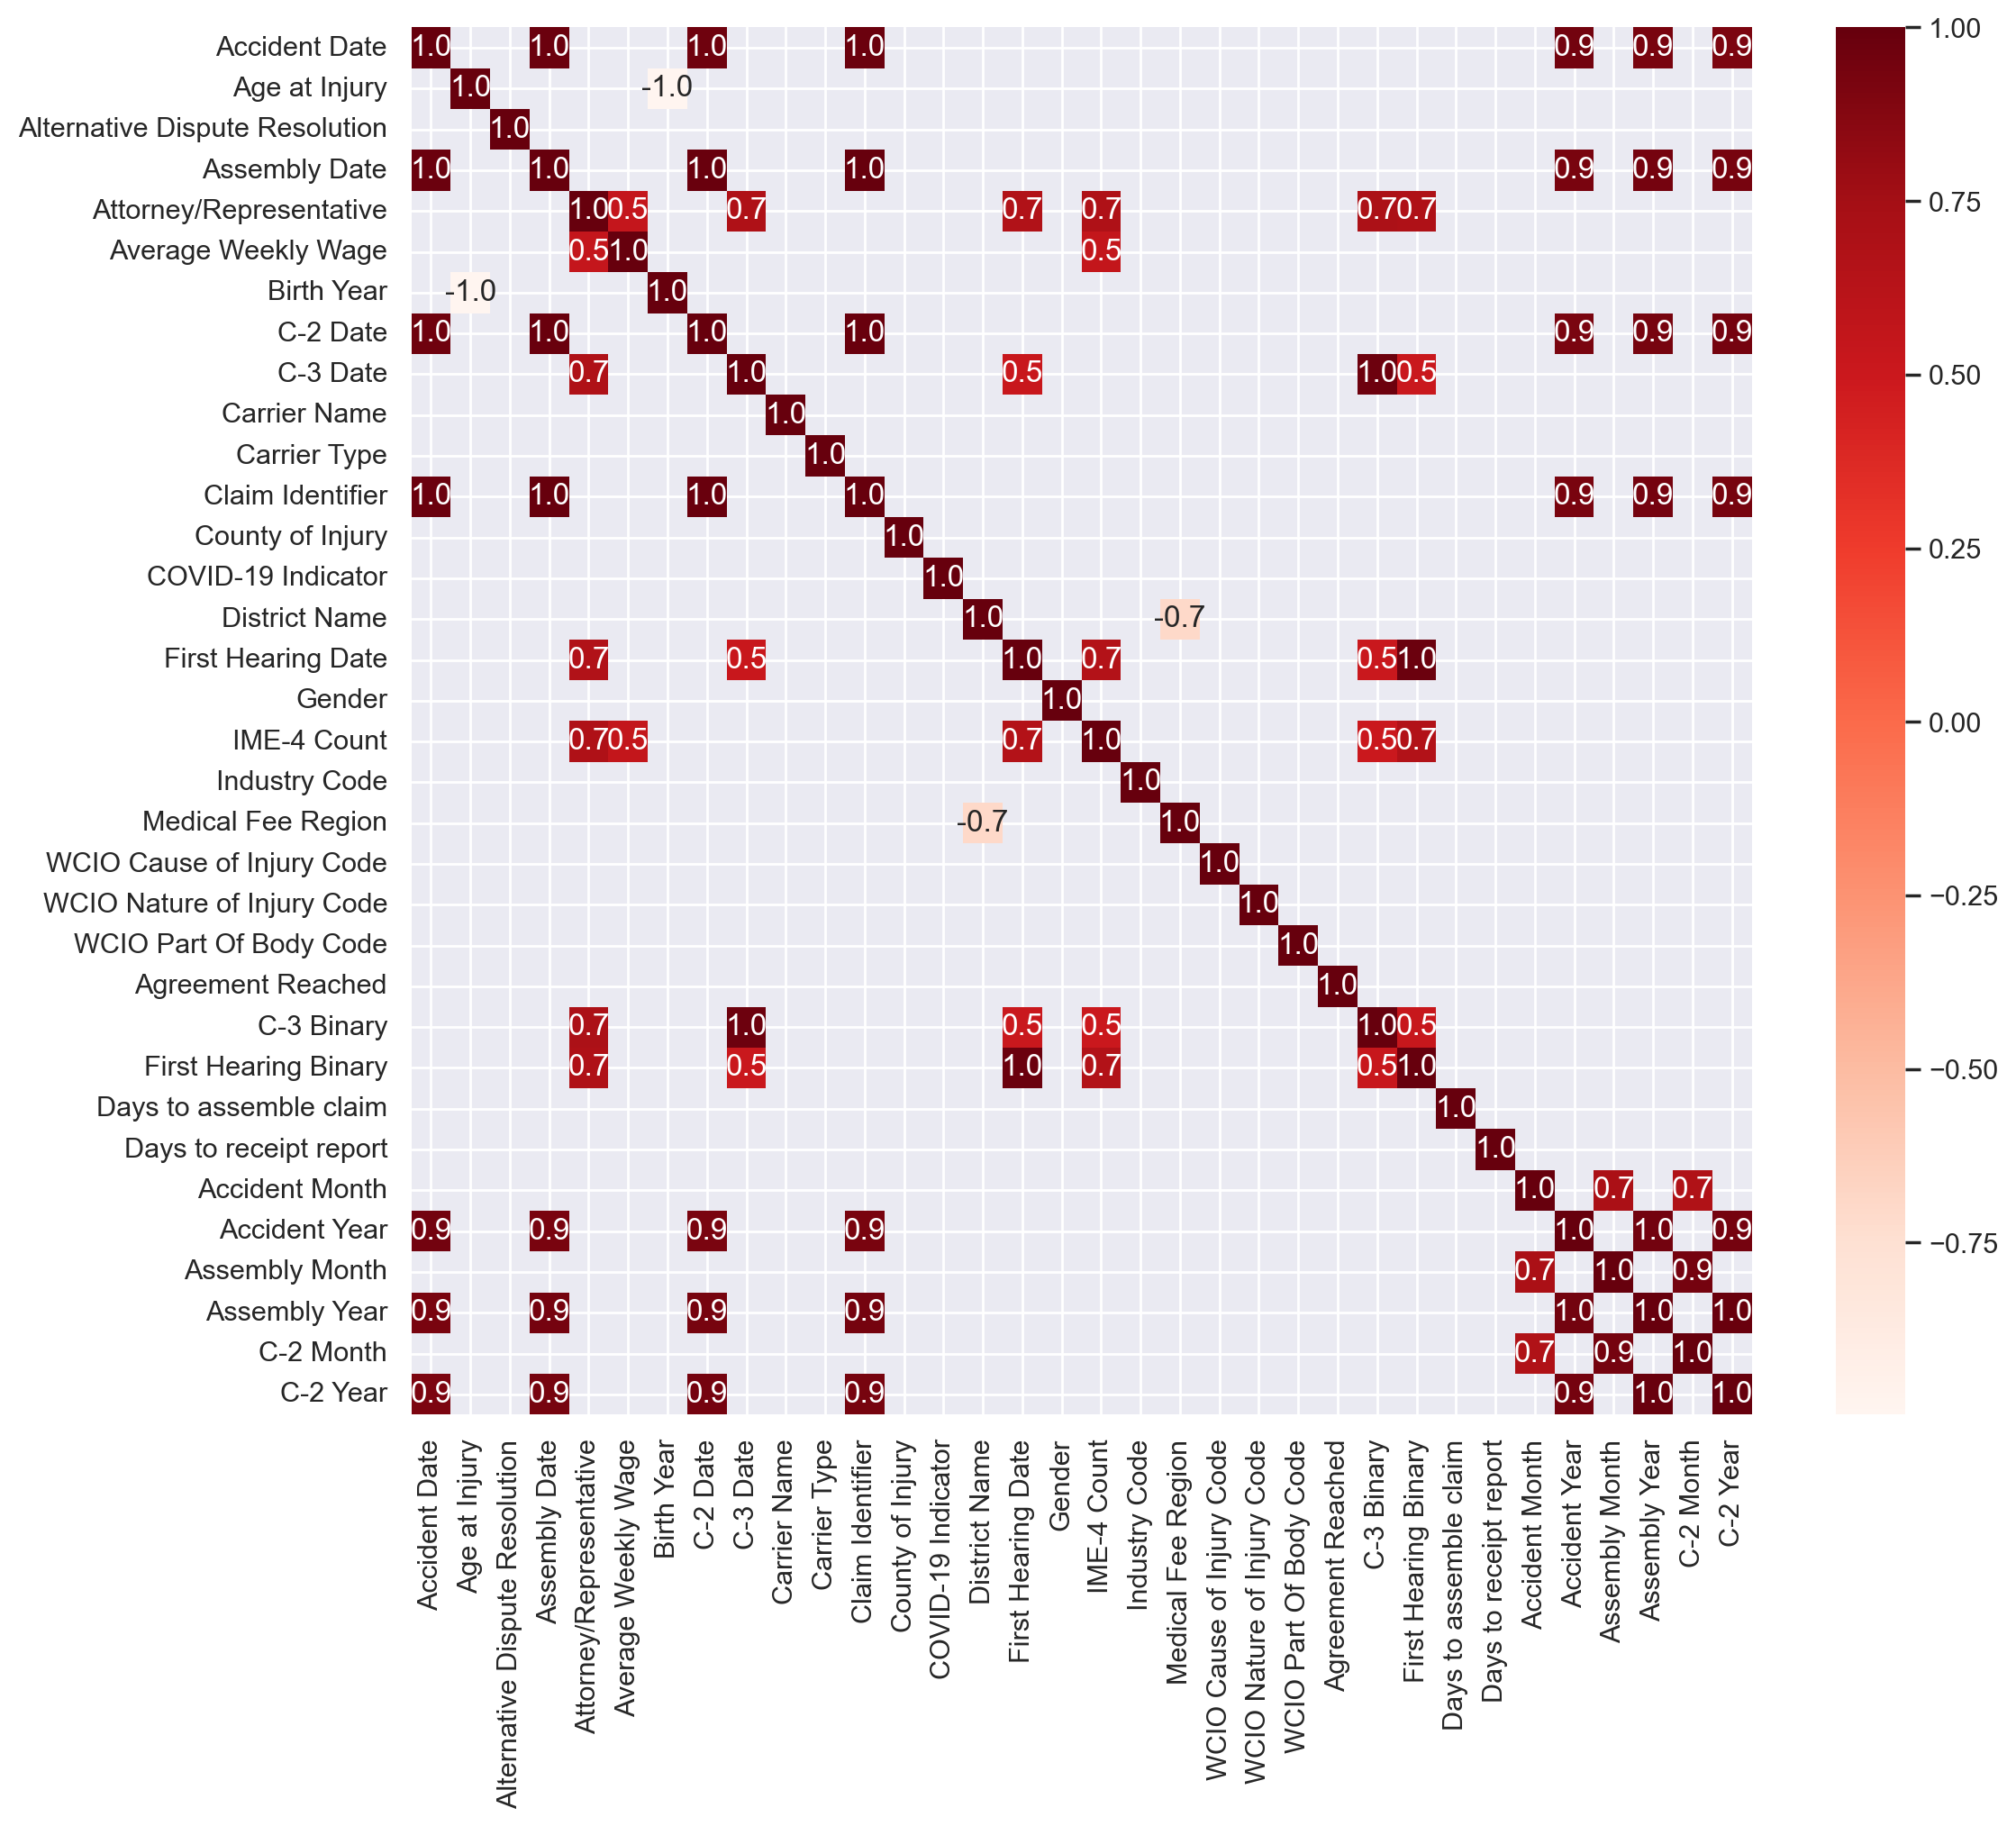

In [184]:
cor_heatmap(cor_spearman)

In [185]:
X_val_scaled = apply_scaling(X_val)

# Ver as primeiras linhas para verificar se o scaling foi aplicado
print(X_val_scaled.head())

Coluna: Accident Date, Valores únicos: 2308
Coluna: Age at Injury, Valores únicos: 94
Coluna: Alternative Dispute Resolution, Valores únicos: 2
Coluna: Assembly Date, Valores únicos: 858
Coluna: Attorney/Representative, Valores únicos: 2
Coluna: Average Weekly Wage, Valores únicos: 32607
Coluna: Birth Year, Valores únicos: 98
Coluna: C-2 Date, Valores únicos: 1416
Coluna: C-3 Date, Valores únicos: 1418
Coluna: Carrier Name, Valores únicos: 1621
Coluna: Carrier Type, Valores únicos: 7
Coluna: Claim Identifier, Valores únicos: 110989
Coluna: County of Injury, Valores únicos: 63
Coluna: COVID-19 Indicator, Valores únicos: 2
Coluna: District Name, Valores únicos: 8
Coluna: First Hearing Date, Valores únicos: 1081
Coluna: Gender, Valores únicos: 3
Coluna: IME-4 Count, Valores únicos: 34
Coluna: Industry Code, Valores únicos: 20
Coluna: Medical Fee Region, Valores únicos: 5
Coluna: WCIO Cause of Injury Code, Valores únicos: 74
Coluna: WCIO Nature of Injury Code, Valores únicos: 55
Coluna: WC

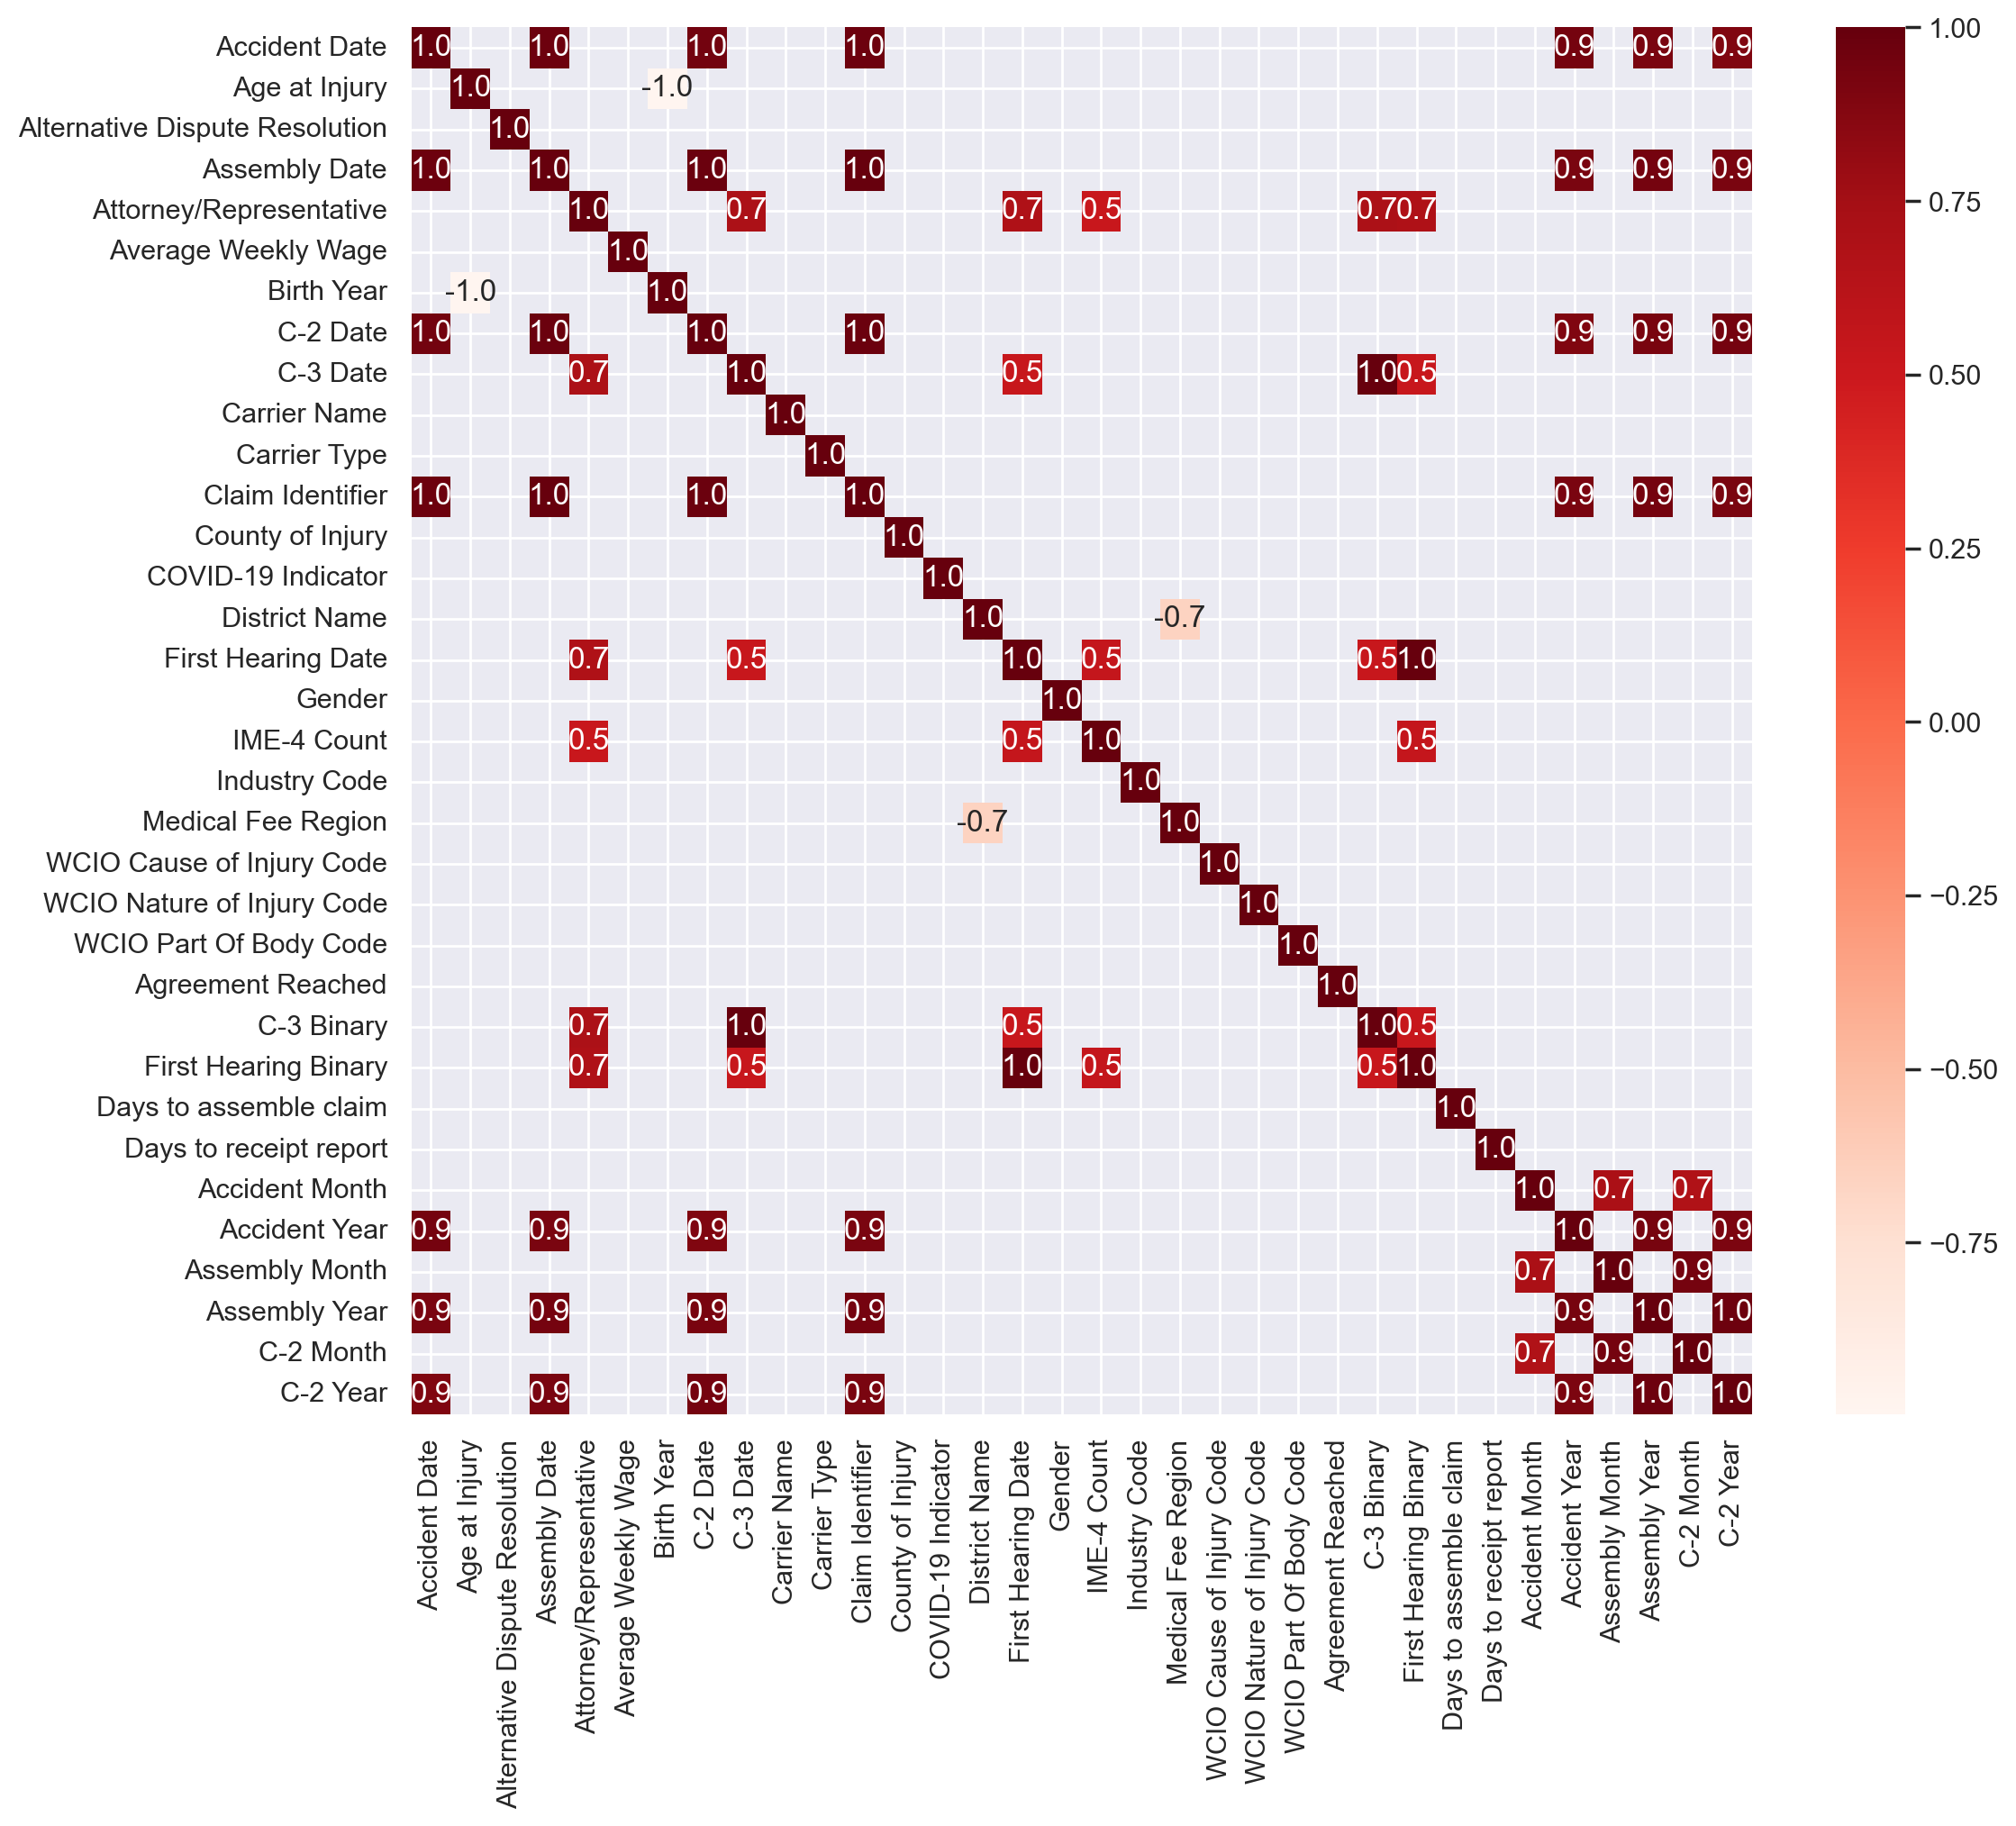

In [186]:
cor_heatmap(cor_pearson)

In [187]:
model = LogisticRegression()

In [188]:
rfe = RFE(estimator = model, n_features_to_select = 10)

In [189]:
X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)

In [190]:
X_rfe

array([[0.        , 0.4109589 , 0.84327177, ..., 0.        , 0.3816521 ,
        0.84615385],
       [1.        , 0.31506849, 0.92601583, ..., 0.        , 0.37172359,
        0.92307692],
       [0.        , 0.91780822, 0.92865435, ..., 0.        , 0.37212073,
        0.92307692],
       ...,
       [1.        , 0.78082192, 0.92073879, ..., 0.        , 0.36973789,
        0.92307692],
       [0.        , 0.80821918, 0.94015831, ..., 0.        , 0.37212073,
        0.92307692],
       [0.        , 0.52054795, 0.87208443, ..., 0.        , 0.37053217,
        0.88461538]])

In [191]:
rfe.support_

array([False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True])

In [192]:
rfe.ranking_

array([15, 22, 25, 12,  1, 24,  1,  1, 11, 19, 21, 10, 18,  1, 23,  1, 13,
        1,  8, 17,  2,  9, 14,  1,  7,  1,  1, 20,  5,  3,  6,  4, 16,  1])

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
selected_features[selected_features==True]

Accident Date                     False
Age at Injury                     False
Alternative Dispute Resolution    False
Assembly Date                     False
Attorney/Representative            True
Average Weekly Wage               False
Birth Year                         True
C-2 Date                           True
C-3 Date                          False
Carrier Name                      False
Carrier Type                      False
Claim Identifier                  False
County of Injury                  False
COVID-19 Indicator                 True
District Name                     False
First Hearing Date                 True
Gender                            False
IME-4 Count                        True
Industry Code                     False
Medical Fee Region                False
WCIO Cause of Injury Code         False
WCIO Nature of Injury Code        False
WCIO Part Of Body Code            False
Agreement Reached                  True
C-3 Binary                        False


In [194]:
# Filtra os nomes das variáveis onde o valor é True
selected_feature_names = selected_features[selected_features == True].index.tolist()

# Mostra os nomes das variáveis selecionadas
print(selected_feature_names)

['Attorney/Representative', 'Birth Year', 'C-2 Date', 'COVID-19 Indicator', 'First Hearing Date', 'IME-4 Count', 'Agreement Reached', 'First Hearing Binary', 'Days to assemble claim', 'C-2 Year']


In [195]:
X_val.isna().sum()

Accident Date                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Date                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
C-2 Date                          0
C-3 Date                          0
Carrier Name                      0
Carrier Type                      0
Claim Identifier                  0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
First Hearing Date                0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Agreement Reached                 0
C-3 Binary                        0
First Hearing Binary              0
Days to assemble claim            0
Days to receipt report      

In [196]:
'''#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))'''

'#no of features\nnof_list=np.arange(1,8)            \nhigh_score=0\n#Variable to store the optimum features\nnof=0           \ntrain_score_list =[]\nval_score_list = []\n\nfor n in range(len(nof_list)):\n    model = LogisticRegression()\n    \n    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])\n    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)\n    X_val_rfe = rfe.transform(X_val_scaled)\n    model.fit(X_train_rfe,y_train)\n    \n    #storing results on training data\n    train_score = model.score(X_train_rfe,y_train)\n    train_score_list.append(train_score)\n    \n    #storing results on training data\n    val_score = model.score(X_val_rfe,y_val)\n    val_score_list.append(val_score)\n    \n    #check best score\n    if(val_score >= high_score):\n        high_score = val_score\n        nof = nof_list[n]\nprint("Optimum number of features: %d" %nof)\nprint("Score with %d features: %f" % (nof, high_score))'

In [197]:
'''plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()'''

'plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color=\'yellowgreen\')\nplt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color=\'dimgray\')\nplt.xlabel("Maximum Depth")\nplt.ylabel("Score")\nplt.legend()\nplt.show()'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

important_features = [X_train.columns[i] for i in range(len(feature_importance)) if feature_importance[i] > 0.05]

In [199]:
important_features

['Attorney/Representative', 'Average Weekly Wage', 'IME-4 Count']

In [200]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [201]:
reg = LassoCV()

In [202]:
reg.fit(X_train_scaled, y_train)

LassoCV()

In [215]:
coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
coef

Accident Date                     0.000000
Age at Injury                     0.194431
Alternative Dispute Resolution   -0.000000
Assembly Date                    -0.000000
Attorney/Representative           0.923763
Average Weekly Wage               0.000000
Birth Year                       -0.000000
C-2 Date                          0.000000
C-3 Date                          0.010734
Carrier Name                      0.079082
Carrier Type                     -0.005474
Claim Identifier                 -1.034461
County of Injury                  0.051782
COVID-19 Indicator               -0.159594
District Name                     0.018855
First Hearing Date                0.439532
Gender                           -0.083671
IME-4 Count                       3.853405
Industry Code                     0.203826
Medical Fee Region               -0.032160
WCIO Cause of Injury Code        -0.124715
WCIO Nature of Injury Code       -0.032421
WCIO Part Of Body Code            0.052773
Agreement R

In [204]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 22 variables and eliminated the other 12 variables


In [205]:
coef.sort_values()

Claim Identifier                 -1.034461
COVID-19 Indicator               -0.159594
WCIO Cause of Injury Code        -0.124715
Gender                           -0.083671
WCIO Nature of Injury Code       -0.032421
Medical Fee Region               -0.032160
Carrier Type                     -0.005474
Assembly Year                    -0.002795
Assembly Month                   -0.000000
Days to receipt report           -0.000000
Days to assemble claim           -0.000000
First Hearing Binary              0.000000
C-2 Month                         0.000000
Accident Date                     0.000000
C-2 Year                          0.000000
Alternative Dispute Resolution   -0.000000
Assembly Date                    -0.000000
Average Weekly Wage               0.000000
Birth Year                       -0.000000
C-2 Date                          0.000000
C-3 Date                          0.010734
District Name                     0.018855
County of Injury                  0.051782
WCIO Part O

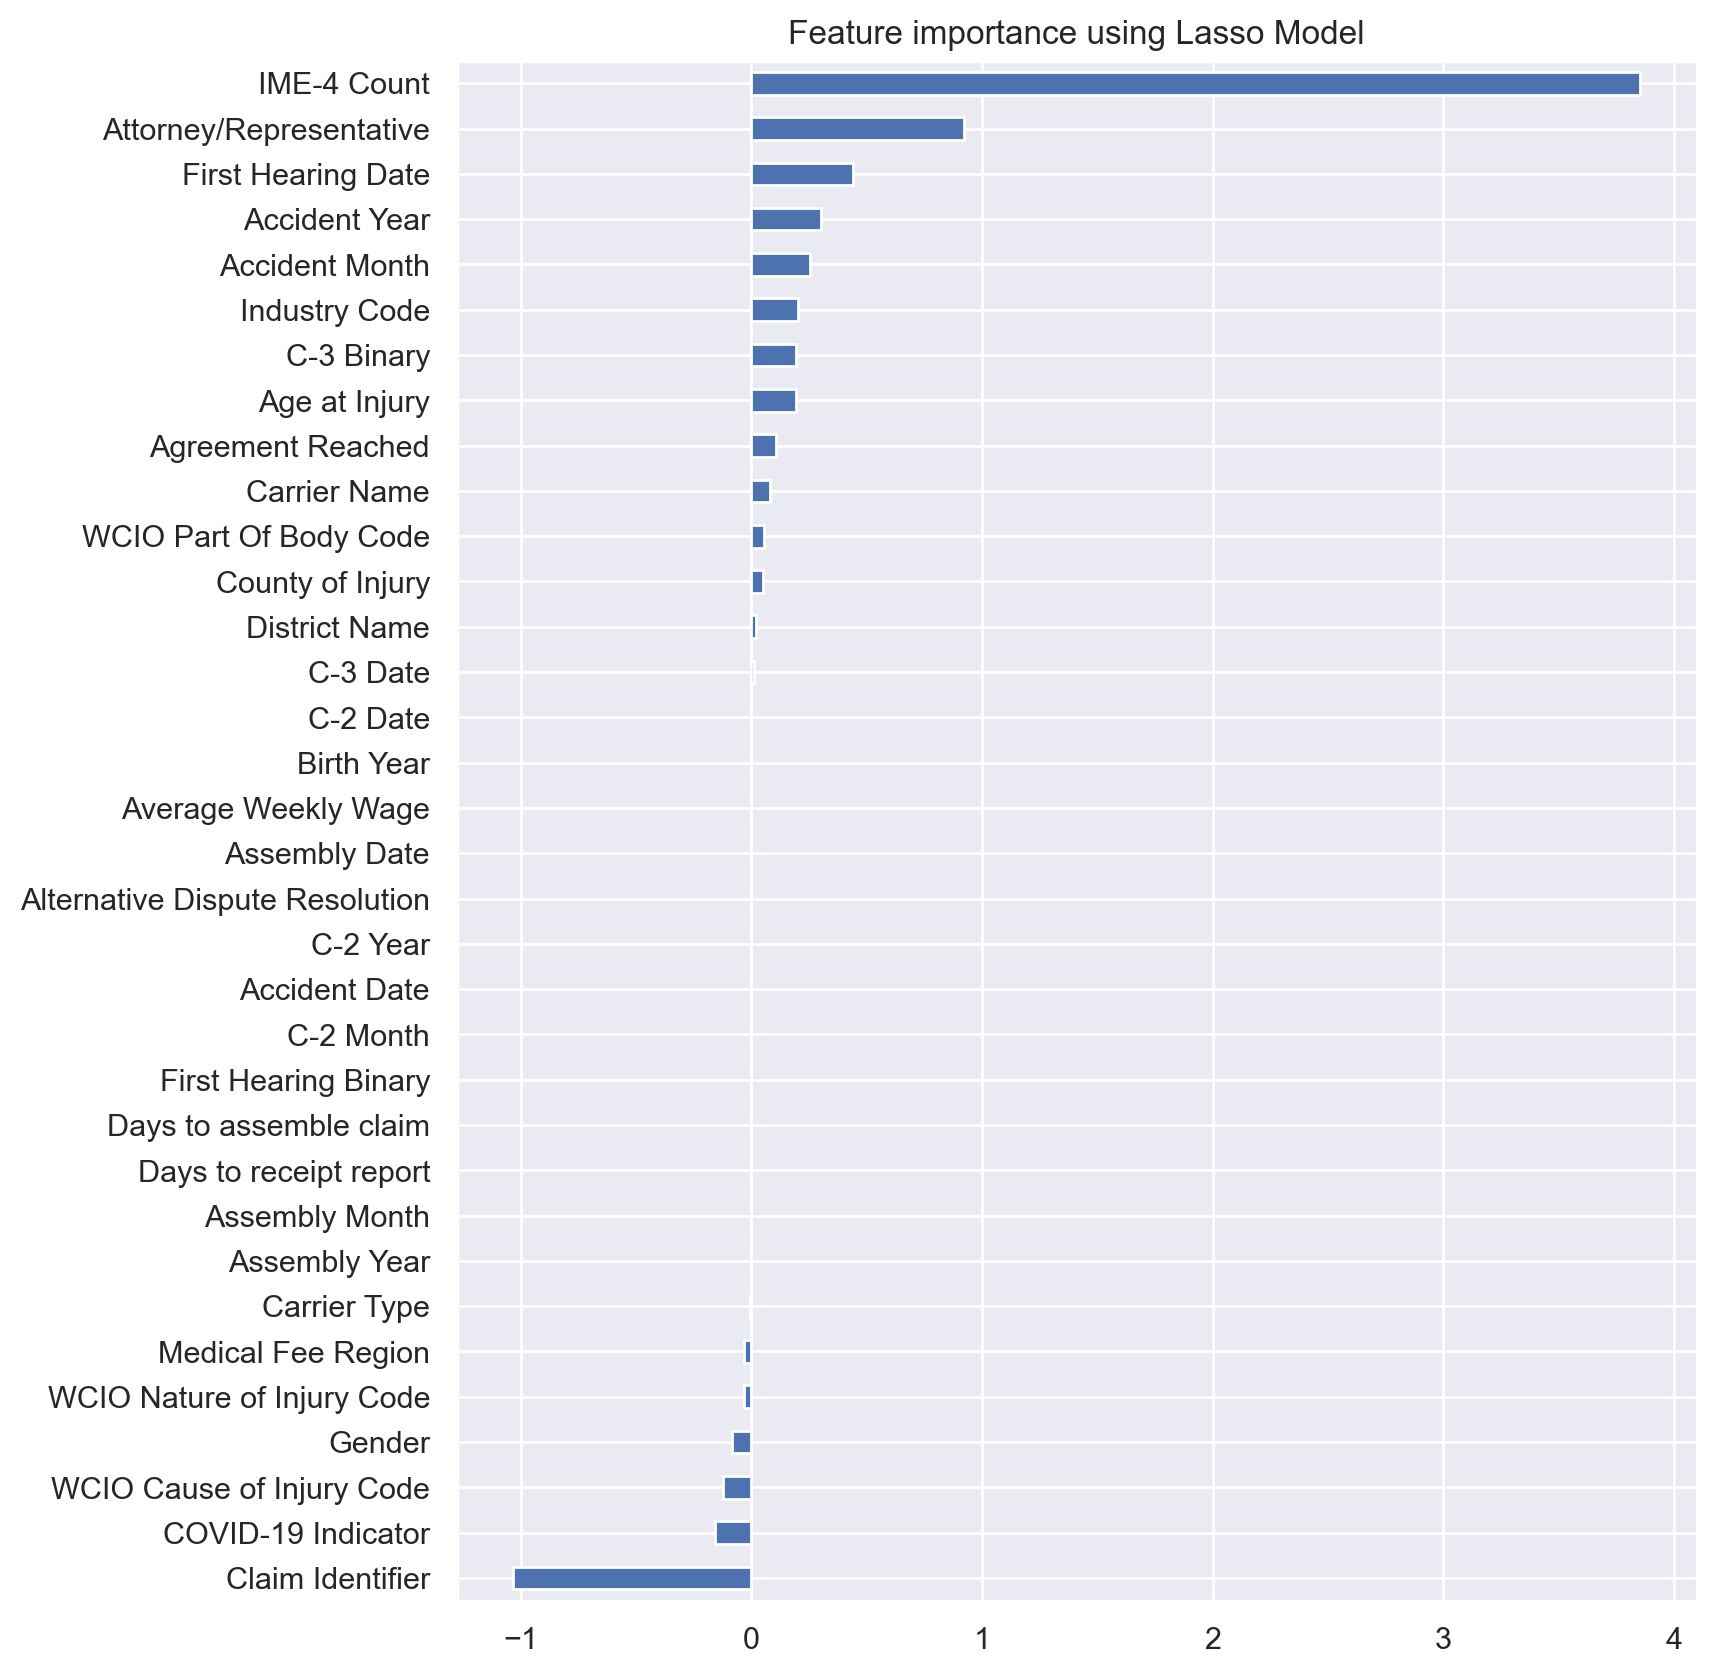

In [206]:
plot_importance(coef,'Lasso')

In [207]:
modelKNN = KNeighborsClassifier()

In [208]:
modelKNN.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [209]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
labels_train

array([2, 4, 2, ..., 4, 2, 2], dtype=int64)

In [210]:
modelKNN.predict_proba(X_val)

array([[0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.6, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ]])

In [211]:
print(modelKNN.score(X_train, y_train))

0.7176391515913906


In [216]:
print(modelKNN.score(X_val, y_val))

0.5694888682662246


In [ ]:
# Calculate the non-null percentage and null counts
non_null_percentage = wcb_test.notna().mean() * 100
null_counts = wcb_test.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': wcb_test.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
29                Number of Dependents           100.000000            0
13                  COVID-19 Indicator           100.000000            0
2       Alternative Dispute Resolution           100.000000            0
3                        Assembly Date           100.000000            0
4              Attorney/Representative           100.000000            0
20                  Medical Fee Region           100.000000            0
16                              Gender           100.000000            0
1                        Age at Injury           100.000000            0
14                       District Name           100.000000            0
9                         Carrier Name           100.000000            0
10                        Carrier Type           100.000000            0
11                    Claim Identifier           100.000000            0
12                    County of Injury           100.000000            0
0                        Accident Date            99.370063         2444
18                       Industry Code            98.006057         7736
19           Industry Code Description            98.006057         7736
7                             C-2 Date            97.645725         9134
26              WCIO Part Of Body Code            97.538759         9549
27       WCIO Part Of Body Description            97.538759         9549
22           WCIO Cause of Injury Code            97.332818        10348
23    WCIO Cause of Injury Description            97.332818        10348
24          WCIO Nature of Injury Code            97.278175        10560
25   WCIO Nature of Injury Description            97.278175        10560
5                  Average Weekly Wage            95.050197        19204
28                            Zip Code            95.014627        19342
6                           Birth Year            94.981635        19470
8                             C-3 Date            21.964302       302759
15                  First Hearing Date            11.090405       344947
17                         IME-4 Count             9.085379       352726
21  OIICS Nature of Injury Description             0.000000       387975